# SVM - UNSW

In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
def load_train_dataset():
    df_train = pd.read_csv('USNW_train-set.csv')
    
    limit1 = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit1]
    Y_train = df_train.iloc[:,limit1]
    
    return  X_train, Y_train,  df_train

X_train, Y_train,  df_train = load_train_dataset()

In [4]:
def load_test_dataset():
    df_test = pd.read_csv('USNW_test-set.csv')
    
    limit2 = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit2]
    Y_test = df_test.iloc[:,limit2]
    
    return X_test, Y_test,df_test

X_test, Y_test ,df_test = load_test_dataset()

In [5]:
X_train, X_val , Y_train , Y_val = train_test_split(X_train,Y_train, test_size=0.065,stratify = Y_train,shuffle=True,random_state=42)

print('Training X   :',X_train.shape)
print('Validation X :',X_val.shape)
print('Test_X       :',X_test.shape)
print('Training_Y   :',Y_train.shape)
print('Validation Y :',Y_val.shape)
print('Test_Y       :',Y_test.shape)

Training X   : (87781, 39)
Validation X : (6103, 39)
Test_X       : (52347, 39)
Training_Y   : (87781,)
Validation Y : (6103,)
Test_Y       : (52347,)


In [6]:
model = SVC(C= 30, gamma= 0.7).fit(X_train,Y_train)

In [7]:
model_poly = SVC(C= 16, kernel= 'poly',degree=4,gamma=0.6).fit(X_train,Y_train)

In [8]:
print('RBF Kernel')
test_predictions = model.predict(X_test)

print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(model, X_val, Y_val, 
                                                                        cv=5,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.6f} %".format(model.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.6f} %".format(accuracy_score(Y_test, test_predictions)*100))

RBF Kernel
Cross-Validation set accuracy: 90.938897 %
Train set accuracy           : 90.525285 %
Test set accuracy            : 74.447437 %


In [9]:
print('Poly Kernel')
test_predictions_poly = model_poly.predict(X_test)

print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(model_poly, X_val, Y_val, 
                                                                        cv=5,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.6f} %".format(model_poly.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.6f} %".format(accuracy_score(Y_test, test_predictions_poly)*100))

Poly Kernel
Cross-Validation set accuracy: 90.922504 %
Train set accuracy           : 90.789579 %
Test set accuracy            : 74.336638 %


In [25]:
predictions = [test_predictions,test_predictions_poly]
kernel_names = ['RBF','Poly']

def plot_cm(labels, predictions,kernel_names, p=0.5):
    fig, axs = plt.subplots(nrows = 1,ncols = 2, figsize=(12, 5))
    for i in range(0,2): 
        pred = predictions[i]
        k_names = kernel_names[i]
        cm = confusion_matrix(labels, pred > p)
        sns.heatmap(cm, annot=True, fmt="d",ax=axs[i])
        axs[i].set(xlabel='Predicted label',ylabel='Actual label',title=str('Confusion matrix @{:.2f}'.format(p))+' '+ str(k_names))
        
        axs[i].text(0.3,2.6,'True Negatives  : '+ str(cm[0][0]),size=14)
        axs[i].text(0.3,2.8,'False Positives   : '+ str(cm[0][1]),size=14)
        axs[i].text(0.3,3,'False Negatives : '+ str(cm[1][0]),size=14)
        axs[i].text(0.3,3.2,'True Positives    : '+ str(cm[1][1]),size=14)

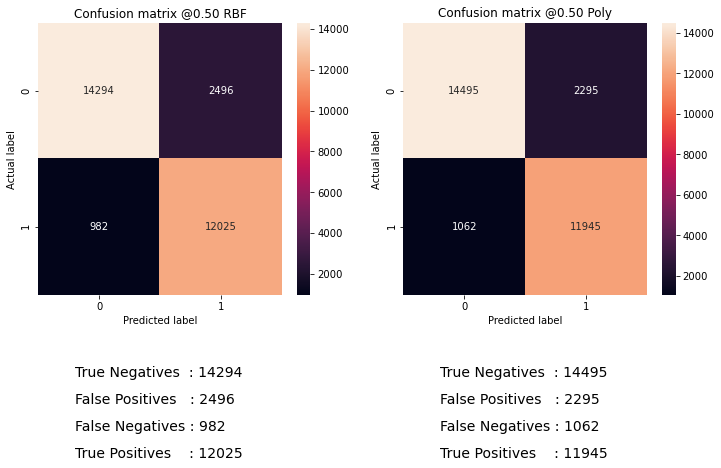

In [26]:
plot_cm(Y_test, predictions,kernel_names)

In [27]:
print('RBF Kernel Classification Report')
print(classification_report(Y_test, test_predictions))
print('\n')
print('Poly Kernel Classification Report')
print(classification_report(Y_test, test_predictions_poly))

RBF Kernel Classification Report
              precision    recall  f1-score   support

           0       0.94      0.85      0.89     16790
           1       0.83      0.92      0.87     13007

    accuracy                           0.88     29797
   macro avg       0.88      0.89      0.88     29797
weighted avg       0.89      0.88      0.88     29797



Poly Kernel Classification Report
              precision    recall  f1-score   support

           0       0.93      0.86      0.90     16790
           1       0.84      0.92      0.88     13007

    accuracy                           0.89     29797
   macro avg       0.89      0.89      0.89     29797
weighted avg       0.89      0.89      0.89     29797



In [26]:
 model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [10]:
param_grid = {'gamma' : [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75],
              'C' : list(range(1,100,2))}

optimal_params = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv=5,
    scoring ='accuracy',
    verbose = 2
)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)

Fitting 5 folds for each of 700 candidates, totalling 3500 fits
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=1, gamma=0.1, total=   0.8s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................................... C=1, gamma=0.1, total=   0.7s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.7s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.7s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.7s
[CV] C=1, gamma=0.15 .................................................
[CV] .................................. C=1, gamma=0.15, total=   0.7s
[CV] C=1, gamma=0.15 .................................................
[CV] .................................. C=1, gamma=0.15, total=   0.7s
[CV] C=1, gamma=0.15 .................................................
[CV] .................................. C=1, gamma=0.15, total=   0.6s
[CV] C=1, gamma=0.15 .................................................
[CV] .

[CV] .................................. C=1, gamma=0.65, total=   0.6s
[CV] C=1, gamma=0.7 ..................................................
[CV] ................................... C=1, gamma=0.7, total=   0.7s
[CV] C=1, gamma=0.7 ..................................................
[CV] ................................... C=1, gamma=0.7, total=   0.6s
[CV] C=1, gamma=0.7 ..................................................
[CV] ................................... C=1, gamma=0.7, total=   0.6s
[CV] C=1, gamma=0.7 ..................................................
[CV] ................................... C=1, gamma=0.7, total=   0.7s
[CV] C=1, gamma=0.7 ..................................................
[CV] ................................... C=1, gamma=0.7, total=   0.6s
[CV] C=1, gamma=0.75 .................................................
[CV] .................................. C=1, gamma=0.75, total=   0.6s
[CV] C=1, gamma=0.75 .................................................
[CV] .

[CV] .................................. C=3, gamma=0.55, total=   0.6s
[CV] C=3, gamma=0.55 .................................................
[CV] .................................. C=3, gamma=0.55, total=   0.7s
[CV] C=3, gamma=0.55 .................................................
[CV] .................................. C=3, gamma=0.55, total=   0.6s
[CV] C=3, gamma=0.6 ..................................................
[CV] ................................... C=3, gamma=0.6, total=   0.6s
[CV] C=3, gamma=0.6 ..................................................
[CV] ................................... C=3, gamma=0.6, total=   0.7s
[CV] C=3, gamma=0.6 ..................................................
[CV] ................................... C=3, gamma=0.6, total=   0.6s
[CV] C=3, gamma=0.6 ..................................................
[CV] ................................... C=3, gamma=0.6, total=   0.6s
[CV] C=3, gamma=0.6 ..................................................
[CV] .

[CV] .................................. C=5, gamma=0.45, total=   0.6s
[CV] C=5, gamma=0.45 .................................................
[CV] .................................. C=5, gamma=0.45, total=   0.6s
[CV] C=5, gamma=0.45 .................................................
[CV] .................................. C=5, gamma=0.45, total=   0.6s
[CV] C=5, gamma=0.45 .................................................
[CV] .................................. C=5, gamma=0.45, total=   0.6s
[CV] C=5, gamma=0.45 .................................................
[CV] .................................. C=5, gamma=0.45, total=   0.7s
[CV] C=5, gamma=0.5 ..................................................
[CV] ................................... C=5, gamma=0.5, total=   0.6s
[CV] C=5, gamma=0.5 ..................................................
[CV] ................................... C=5, gamma=0.5, total=   0.6s
[CV] C=5, gamma=0.5 ..................................................
[CV] .

[CV] ................................... C=7, gamma=0.3, total=   0.7s
[CV] C=7, gamma=0.3 ..................................................
[CV] ................................... C=7, gamma=0.3, total=   0.7s
[CV] C=7, gamma=0.35 .................................................
[CV] .................................. C=7, gamma=0.35, total=   0.6s
[CV] C=7, gamma=0.35 .................................................
[CV] .................................. C=7, gamma=0.35, total=   0.7s
[CV] C=7, gamma=0.35 .................................................
[CV] .................................. C=7, gamma=0.35, total=   0.6s
[CV] C=7, gamma=0.35 .................................................
[CV] .................................. C=7, gamma=0.35, total=   0.7s
[CV] C=7, gamma=0.35 .................................................
[CV] .................................. C=7, gamma=0.35, total=   0.6s
[CV] C=7, gamma=0.4 ..................................................
[CV] .

[CV] ................................... C=9, gamma=0.2, total=   0.8s
[CV] C=9, gamma=0.2 ..................................................
[CV] ................................... C=9, gamma=0.2, total=   0.8s
[CV] C=9, gamma=0.2 ..................................................
[CV] ................................... C=9, gamma=0.2, total=   0.7s
[CV] C=9, gamma=0.2 ..................................................
[CV] ................................... C=9, gamma=0.2, total=   0.8s
[CV] C=9, gamma=0.25 .................................................
[CV] .................................. C=9, gamma=0.25, total=   0.8s
[CV] C=9, gamma=0.25 .................................................
[CV] .................................. C=9, gamma=0.25, total=   0.7s
[CV] C=9, gamma=0.25 .................................................
[CV] .................................. C=9, gamma=0.25, total=   0.8s
[CV] C=9, gamma=0.25 .................................................
[CV] .

[CV] .................................. C=9, gamma=0.75, total=   0.7s
[CV] C=11, gamma=0.1 .................................................
[CV] .................................. C=11, gamma=0.1, total=   0.6s
[CV] C=11, gamma=0.1 .................................................
[CV] .................................. C=11, gamma=0.1, total=   0.8s
[CV] C=11, gamma=0.1 .................................................
[CV] .................................. C=11, gamma=0.1, total=   0.8s
[CV] C=11, gamma=0.1 .................................................
[CV] .................................. C=11, gamma=0.1, total=   0.9s
[CV] C=11, gamma=0.1 .................................................
[CV] .................................. C=11, gamma=0.1, total=   0.8s
[CV] C=11, gamma=0.15 ................................................
[CV] ................................. C=11, gamma=0.15, total=   0.6s
[CV] C=11, gamma=0.15 ................................................
[CV] .

[CV] ................................. C=11, gamma=0.65, total=   0.7s
[CV] C=11, gamma=0.65 ................................................
[CV] ................................. C=11, gamma=0.65, total=   0.8s
[CV] C=11, gamma=0.65 ................................................
[CV] ................................. C=11, gamma=0.65, total=   0.7s
[CV] C=11, gamma=0.7 .................................................
[CV] .................................. C=11, gamma=0.7, total=   0.7s
[CV] C=11, gamma=0.7 .................................................
[CV] .................................. C=11, gamma=0.7, total=   0.7s
[CV] C=11, gamma=0.7 .................................................
[CV] .................................. C=11, gamma=0.7, total=   0.7s
[CV] C=11, gamma=0.7 .................................................
[CV] .................................. C=11, gamma=0.7, total=   0.8s
[CV] C=11, gamma=0.7 .................................................
[CV] .

[CV] ................................. C=13, gamma=0.55, total=   0.8s
[CV] C=13, gamma=0.55 ................................................
[CV] ................................. C=13, gamma=0.55, total=   0.7s
[CV] C=13, gamma=0.55 ................................................
[CV] ................................. C=13, gamma=0.55, total=   0.8s
[CV] C=13, gamma=0.55 ................................................
[CV] ................................. C=13, gamma=0.55, total=   0.8s
[CV] C=13, gamma=0.55 ................................................
[CV] ................................. C=13, gamma=0.55, total=   0.7s
[CV] C=13, gamma=0.6 .................................................
[CV] .................................. C=13, gamma=0.6, total=   0.9s
[CV] C=13, gamma=0.6 .................................................
[CV] .................................. C=13, gamma=0.6, total=   0.8s
[CV] C=13, gamma=0.6 .................................................
[CV] .

[CV] .................................. C=15, gamma=0.4, total=   0.7s
[CV] C=15, gamma=0.4 .................................................
[CV] .................................. C=15, gamma=0.4, total=   0.7s
[CV] C=15, gamma=0.45 ................................................
[CV] ................................. C=15, gamma=0.45, total=   0.7s
[CV] C=15, gamma=0.45 ................................................
[CV] ................................. C=15, gamma=0.45, total=   0.7s
[CV] C=15, gamma=0.45 ................................................
[CV] ................................. C=15, gamma=0.45, total=   0.7s
[CV] C=15, gamma=0.45 ................................................
[CV] ................................. C=15, gamma=0.45, total=   0.7s
[CV] C=15, gamma=0.45 ................................................
[CV] ................................. C=15, gamma=0.45, total=   1.1s
[CV] C=15, gamma=0.5 .................................................
[CV] .

[CV] .................................. C=17, gamma=0.3, total=   0.7s
[CV] C=17, gamma=0.3 .................................................
[CV] .................................. C=17, gamma=0.3, total=   0.9s
[CV] C=17, gamma=0.3 .................................................
[CV] .................................. C=17, gamma=0.3, total=   0.8s
[CV] C=17, gamma=0.3 .................................................
[CV] .................................. C=17, gamma=0.3, total=   0.7s
[CV] C=17, gamma=0.35 ................................................
[CV] ................................. C=17, gamma=0.35, total=   0.7s
[CV] C=17, gamma=0.35 ................................................
[CV] ................................. C=17, gamma=0.35, total=   0.7s
[CV] C=17, gamma=0.35 ................................................
[CV] ................................. C=17, gamma=0.35, total=   0.8s
[CV] C=17, gamma=0.35 ................................................
[CV] .

[CV] ................................. C=19, gamma=0.15, total=   0.7s
[CV] C=19, gamma=0.2 .................................................
[CV] .................................. C=19, gamma=0.2, total=   0.7s
[CV] C=19, gamma=0.2 .................................................
[CV] .................................. C=19, gamma=0.2, total=   0.8s
[CV] C=19, gamma=0.2 .................................................
[CV] .................................. C=19, gamma=0.2, total=   1.5s
[CV] C=19, gamma=0.2 .................................................
[CV] .................................. C=19, gamma=0.2, total=   1.4s
[CV] C=19, gamma=0.2 .................................................
[CV] .................................. C=19, gamma=0.2, total=   1.4s
[CV] C=19, gamma=0.25 ................................................
[CV] ................................. C=19, gamma=0.25, total=   1.4s
[CV] C=19, gamma=0.25 ................................................
[CV] .

[CV] ................................. C=19, gamma=0.75, total=   0.8s
[CV] C=19, gamma=0.75 ................................................
[CV] ................................. C=19, gamma=0.75, total=   0.8s
[CV] C=19, gamma=0.75 ................................................
[CV] ................................. C=19, gamma=0.75, total=   0.8s
[CV] C=21, gamma=0.1 .................................................
[CV] .................................. C=21, gamma=0.1, total=   0.7s
[CV] C=21, gamma=0.1 .................................................
[CV] .................................. C=21, gamma=0.1, total=   0.8s
[CV] C=21, gamma=0.1 .................................................
[CV] .................................. C=21, gamma=0.1, total=   0.8s
[CV] C=21, gamma=0.1 .................................................
[CV] .................................. C=21, gamma=0.1, total=   0.8s
[CV] C=21, gamma=0.1 .................................................
[CV] .

[CV] ................................. C=21, gamma=0.65, total=   0.7s
[CV] C=21, gamma=0.65 ................................................
[CV] ................................. C=21, gamma=0.65, total=   0.8s
[CV] C=21, gamma=0.65 ................................................
[CV] ................................. C=21, gamma=0.65, total=   1.4s
[CV] C=21, gamma=0.65 ................................................
[CV] ................................. C=21, gamma=0.65, total=   1.6s
[CV] C=21, gamma=0.65 ................................................
[CV] ................................. C=21, gamma=0.65, total=   1.5s
[CV] C=21, gamma=0.7 .................................................
[CV] .................................. C=21, gamma=0.7, total=   1.4s
[CV] C=21, gamma=0.7 .................................................
[CV] .................................. C=21, gamma=0.7, total=   1.3s
[CV] C=21, gamma=0.7 .................................................
[CV] .

[CV] .................................. C=23, gamma=0.5, total=   0.8s
[CV] C=23, gamma=0.5 .................................................
[CV] .................................. C=23, gamma=0.5, total=   0.8s
[CV] C=23, gamma=0.55 ................................................
[CV] ................................. C=23, gamma=0.55, total=   0.8s
[CV] C=23, gamma=0.55 ................................................
[CV] ................................. C=23, gamma=0.55, total=   0.8s
[CV] C=23, gamma=0.55 ................................................
[CV] ................................. C=23, gamma=0.55, total=   0.8s
[CV] C=23, gamma=0.55 ................................................
[CV] ................................. C=23, gamma=0.55, total=   0.8s
[CV] C=23, gamma=0.55 ................................................
[CV] ................................. C=23, gamma=0.55, total=   0.8s
[CV] C=23, gamma=0.6 .................................................
[CV] .

[CV] .................................. C=25, gamma=0.4, total=   0.8s
[CV] C=25, gamma=0.4 .................................................
[CV] .................................. C=25, gamma=0.4, total=   0.8s
[CV] C=25, gamma=0.4 .................................................
[CV] .................................. C=25, gamma=0.4, total=   1.2s
[CV] C=25, gamma=0.4 .................................................
[CV] .................................. C=25, gamma=0.4, total=   1.4s
[CV] C=25, gamma=0.45 ................................................
[CV] ................................. C=25, gamma=0.45, total=   1.1s
[CV] C=25, gamma=0.45 ................................................
[CV] ................................. C=25, gamma=0.45, total=   1.1s
[CV] C=25, gamma=0.45 ................................................
[CV] ................................. C=25, gamma=0.45, total=   1.0s
[CV] C=25, gamma=0.45 ................................................
[CV] .

[CV] ................................. C=27, gamma=0.25, total=   0.8s
[CV] C=27, gamma=0.3 .................................................
[CV] .................................. C=27, gamma=0.3, total=   0.8s
[CV] C=27, gamma=0.3 .................................................
[CV] .................................. C=27, gamma=0.3, total=   0.8s
[CV] C=27, gamma=0.3 .................................................
[CV] .................................. C=27, gamma=0.3, total=   0.8s
[CV] C=27, gamma=0.3 .................................................
[CV] .................................. C=27, gamma=0.3, total=   0.8s
[CV] C=27, gamma=0.3 .................................................
[CV] .................................. C=27, gamma=0.3, total=   0.8s
[CV] C=27, gamma=0.35 ................................................
[CV] ................................. C=27, gamma=0.35, total=   0.8s
[CV] C=27, gamma=0.35 ................................................
[CV] .

[CV] ................................. C=29, gamma=0.15, total=   0.9s
[CV] C=29, gamma=0.15 ................................................
[CV] ................................. C=29, gamma=0.15, total=   0.8s
[CV] C=29, gamma=0.15 ................................................
[CV] ................................. C=29, gamma=0.15, total=   0.8s
[CV] C=29, gamma=0.2 .................................................
[CV] .................................. C=29, gamma=0.2, total=   0.8s
[CV] C=29, gamma=0.2 .................................................
[CV] .................................. C=29, gamma=0.2, total=   0.8s
[CV] C=29, gamma=0.2 .................................................
[CV] .................................. C=29, gamma=0.2, total=   0.8s
[CV] C=29, gamma=0.2 .................................................
[CV] .................................. C=29, gamma=0.2, total=   0.8s
[CV] C=29, gamma=0.2 .................................................
[CV] .

[CV] ................................. C=29, gamma=0.75, total=   1.0s
[CV] C=29, gamma=0.75 ................................................
[CV] ................................. C=29, gamma=0.75, total=   1.2s
[CV] C=29, gamma=0.75 ................................................
[CV] ................................. C=29, gamma=0.75, total=   1.2s
[CV] C=29, gamma=0.75 ................................................
[CV] ................................. C=29, gamma=0.75, total=   1.3s
[CV] C=29, gamma=0.75 ................................................
[CV] ................................. C=29, gamma=0.75, total=   1.2s
[CV] C=31, gamma=0.1 .................................................
[CV] .................................. C=31, gamma=0.1, total=   1.0s
[CV] C=31, gamma=0.1 .................................................
[CV] .................................. C=31, gamma=0.1, total=   0.8s
[CV] C=31, gamma=0.1 .................................................
[CV] .

[CV] .................................. C=31, gamma=0.6, total=   0.9s
[CV] C=31, gamma=0.6 .................................................
[CV] .................................. C=31, gamma=0.6, total=   0.9s
[CV] C=31, gamma=0.65 ................................................
[CV] ................................. C=31, gamma=0.65, total=   0.7s
[CV] C=31, gamma=0.65 ................................................
[CV] ................................. C=31, gamma=0.65, total=   0.8s
[CV] C=31, gamma=0.65 ................................................
[CV] ................................. C=31, gamma=0.65, total=   0.8s
[CV] C=31, gamma=0.65 ................................................
[CV] ................................. C=31, gamma=0.65, total=   0.9s
[CV] C=31, gamma=0.65 ................................................
[CV] ................................. C=31, gamma=0.65, total=   0.8s
[CV] C=31, gamma=0.7 .................................................
[CV] .

[CV] .................................. C=33, gamma=0.5, total=   0.7s
[CV] C=33, gamma=0.5 .................................................
[CV] .................................. C=33, gamma=0.5, total=   0.8s
[CV] C=33, gamma=0.5 .................................................
[CV] .................................. C=33, gamma=0.5, total=   0.8s
[CV] C=33, gamma=0.5 .................................................
[CV] .................................. C=33, gamma=0.5, total=   0.7s
[CV] C=33, gamma=0.55 ................................................
[CV] ................................. C=33, gamma=0.55, total=   0.7s
[CV] C=33, gamma=0.55 ................................................
[CV] ................................. C=33, gamma=0.55, total=   0.7s
[CV] C=33, gamma=0.55 ................................................
[CV] ................................. C=33, gamma=0.55, total=   0.7s
[CV] C=33, gamma=0.55 ................................................
[CV] .

[CV] ................................. C=35, gamma=0.35, total=   0.9s
[CV] C=35, gamma=0.4 .................................................
[CV] .................................. C=35, gamma=0.4, total=   0.7s
[CV] C=35, gamma=0.4 .................................................
[CV] .................................. C=35, gamma=0.4, total=   0.6s
[CV] C=35, gamma=0.4 .................................................
[CV] .................................. C=35, gamma=0.4, total=   0.6s
[CV] C=35, gamma=0.4 .................................................
[CV] .................................. C=35, gamma=0.4, total=   0.7s
[CV] C=35, gamma=0.4 .................................................
[CV] .................................. C=35, gamma=0.4, total=   0.6s
[CV] C=35, gamma=0.45 ................................................
[CV] ................................. C=35, gamma=0.45, total=   0.6s
[CV] C=35, gamma=0.45 ................................................
[CV] .

[CV] ................................. C=37, gamma=0.25, total=   0.7s
[CV] C=37, gamma=0.25 ................................................
[CV] ................................. C=37, gamma=0.25, total=   0.7s
[CV] C=37, gamma=0.25 ................................................
[CV] ................................. C=37, gamma=0.25, total=   0.7s
[CV] C=37, gamma=0.3 .................................................
[CV] .................................. C=37, gamma=0.3, total=   0.7s
[CV] C=37, gamma=0.3 .................................................
[CV] .................................. C=37, gamma=0.3, total=   0.7s
[CV] C=37, gamma=0.3 .................................................
[CV] .................................. C=37, gamma=0.3, total=   0.7s
[CV] C=37, gamma=0.3 .................................................
[CV] .................................. C=37, gamma=0.3, total=   0.7s
[CV] C=37, gamma=0.3 .................................................
[CV] .

[CV] ................................. C=39, gamma=0.15, total=   0.9s
[CV] C=39, gamma=0.15 ................................................
[CV] ................................. C=39, gamma=0.15, total=   0.8s
[CV] C=39, gamma=0.15 ................................................
[CV] ................................. C=39, gamma=0.15, total=   0.8s
[CV] C=39, gamma=0.15 ................................................
[CV] ................................. C=39, gamma=0.15, total=   0.8s
[CV] C=39, gamma=0.15 ................................................
[CV] ................................. C=39, gamma=0.15, total=   0.8s
[CV] C=39, gamma=0.2 .................................................
[CV] .................................. C=39, gamma=0.2, total=   0.8s
[CV] C=39, gamma=0.2 .................................................
[CV] .................................. C=39, gamma=0.2, total=   0.8s
[CV] C=39, gamma=0.2 .................................................
[CV] .

[CV] .................................. C=39, gamma=0.7, total=   0.8s
[CV] C=39, gamma=0.7 .................................................
[CV] .................................. C=39, gamma=0.7, total=   0.7s
[CV] C=39, gamma=0.75 ................................................
[CV] ................................. C=39, gamma=0.75, total=   0.7s
[CV] C=39, gamma=0.75 ................................................
[CV] ................................. C=39, gamma=0.75, total=   0.7s
[CV] C=39, gamma=0.75 ................................................
[CV] ................................. C=39, gamma=0.75, total=   0.7s
[CV] C=39, gamma=0.75 ................................................
[CV] ................................. C=39, gamma=0.75, total=   1.4s
[CV] C=39, gamma=0.75 ................................................
[CV] ................................. C=39, gamma=0.75, total=   1.5s
[CV] C=41, gamma=0.1 .................................................
[CV] .

[CV] .................................. C=41, gamma=0.6, total=   0.8s
[CV] C=41, gamma=0.6 .................................................
[CV] .................................. C=41, gamma=0.6, total=   0.8s
[CV] C=41, gamma=0.6 .................................................
[CV] .................................. C=41, gamma=0.6, total=   0.9s
[CV] C=41, gamma=0.6 .................................................
[CV] .................................. C=41, gamma=0.6, total=   0.7s
[CV] C=41, gamma=0.65 ................................................
[CV] ................................. C=41, gamma=0.65, total=   0.7s
[CV] C=41, gamma=0.65 ................................................
[CV] ................................. C=41, gamma=0.65, total=   0.8s
[CV] C=41, gamma=0.65 ................................................
[CV] ................................. C=41, gamma=0.65, total=   0.8s
[CV] C=41, gamma=0.65 ................................................
[CV] .

[CV] ................................. C=43, gamma=0.45, total=   0.9s
[CV] C=43, gamma=0.5 .................................................
[CV] .................................. C=43, gamma=0.5, total=   1.0s
[CV] C=43, gamma=0.5 .................................................
[CV] .................................. C=43, gamma=0.5, total=   1.0s
[CV] C=43, gamma=0.5 .................................................
[CV] .................................. C=43, gamma=0.5, total=   1.0s
[CV] C=43, gamma=0.5 .................................................
[CV] .................................. C=43, gamma=0.5, total=   1.1s
[CV] C=43, gamma=0.5 .................................................
[CV] .................................. C=43, gamma=0.5, total=   0.9s
[CV] C=43, gamma=0.55 ................................................
[CV] ................................. C=43, gamma=0.55, total=   0.7s
[CV] C=43, gamma=0.55 ................................................
[CV] .

[CV] ................................. C=45, gamma=0.35, total=   0.7s
[CV] C=45, gamma=0.35 ................................................
[CV] ................................. C=45, gamma=0.35, total=   0.8s
[CV] C=45, gamma=0.35 ................................................
[CV] ................................. C=45, gamma=0.35, total=   0.7s
[CV] C=45, gamma=0.4 .................................................
[CV] .................................. C=45, gamma=0.4, total=   0.7s
[CV] C=45, gamma=0.4 .................................................
[CV] .................................. C=45, gamma=0.4, total=   0.7s
[CV] C=45, gamma=0.4 .................................................
[CV] .................................. C=45, gamma=0.4, total=   0.7s
[CV] C=45, gamma=0.4 .................................................
[CV] .................................. C=45, gamma=0.4, total=   0.8s
[CV] C=45, gamma=0.4 .................................................
[CV] .

[CV] ................................. C=47, gamma=0.25, total=   0.7s
[CV] C=47, gamma=0.25 ................................................
[CV] ................................. C=47, gamma=0.25, total=   0.7s
[CV] C=47, gamma=0.25 ................................................
[CV] ................................. C=47, gamma=0.25, total=   0.7s
[CV] C=47, gamma=0.25 ................................................
[CV] ................................. C=47, gamma=0.25, total=   0.9s
[CV] C=47, gamma=0.25 ................................................
[CV] ................................. C=47, gamma=0.25, total=   0.7s
[CV] C=47, gamma=0.3 .................................................
[CV] .................................. C=47, gamma=0.3, total=   0.7s
[CV] C=47, gamma=0.3 .................................................
[CV] .................................. C=47, gamma=0.3, total=   0.7s
[CV] C=47, gamma=0.3 .................................................
[CV] .

[CV] .................................. C=49, gamma=0.1, total=   0.8s
[CV] C=49, gamma=0.1 .................................................
[CV] .................................. C=49, gamma=0.1, total=   0.8s
[CV] C=49, gamma=0.15 ................................................
[CV] ................................. C=49, gamma=0.15, total=   0.8s
[CV] C=49, gamma=0.15 ................................................
[CV] ................................. C=49, gamma=0.15, total=   0.7s
[CV] C=49, gamma=0.15 ................................................
[CV] ................................. C=49, gamma=0.15, total=   0.7s
[CV] C=49, gamma=0.15 ................................................
[CV] ................................. C=49, gamma=0.15, total=   0.7s
[CV] C=49, gamma=0.15 ................................................
[CV] ................................. C=49, gamma=0.15, total=   0.7s
[CV] C=49, gamma=0.2 .................................................
[CV] .

[CV] .................................. C=49, gamma=0.7, total=   0.7s
[CV] C=49, gamma=0.7 .................................................
[CV] .................................. C=49, gamma=0.7, total=   0.7s
[CV] C=49, gamma=0.7 .................................................
[CV] .................................. C=49, gamma=0.7, total=   0.8s
[CV] C=49, gamma=0.7 .................................................
[CV] .................................. C=49, gamma=0.7, total=   0.7s
[CV] C=49, gamma=0.75 ................................................
[CV] ................................. C=49, gamma=0.75, total=   0.6s
[CV] C=49, gamma=0.75 ................................................
[CV] ................................. C=49, gamma=0.75, total=   0.6s
[CV] C=49, gamma=0.75 ................................................
[CV] ................................. C=49, gamma=0.75, total=   0.7s
[CV] C=49, gamma=0.75 ................................................
[CV] .

[CV] ................................. C=51, gamma=0.55, total=   0.7s
[CV] C=51, gamma=0.6 .................................................
[CV] .................................. C=51, gamma=0.6, total=   0.6s
[CV] C=51, gamma=0.6 .................................................
[CV] .................................. C=51, gamma=0.6, total=   0.7s
[CV] C=51, gamma=0.6 .................................................
[CV] .................................. C=51, gamma=0.6, total=   0.6s
[CV] C=51, gamma=0.6 .................................................
[CV] .................................. C=51, gamma=0.6, total=   0.7s
[CV] C=51, gamma=0.6 .................................................
[CV] .................................. C=51, gamma=0.6, total=   0.7s
[CV] C=51, gamma=0.65 ................................................
[CV] ................................. C=51, gamma=0.65, total=   0.6s
[CV] C=51, gamma=0.65 ................................................
[CV] .

[CV] ................................. C=53, gamma=0.45, total=   0.7s
[CV] C=53, gamma=0.45 ................................................
[CV] ................................. C=53, gamma=0.45, total=   0.7s
[CV] C=53, gamma=0.45 ................................................
[CV] ................................. C=53, gamma=0.45, total=   0.7s
[CV] C=53, gamma=0.5 .................................................
[CV] .................................. C=53, gamma=0.5, total=   0.7s
[CV] C=53, gamma=0.5 .................................................
[CV] .................................. C=53, gamma=0.5, total=   0.8s
[CV] C=53, gamma=0.5 .................................................
[CV] .................................. C=53, gamma=0.5, total=   0.8s
[CV] C=53, gamma=0.5 .................................................
[CV] .................................. C=53, gamma=0.5, total=   0.8s
[CV] C=53, gamma=0.5 .................................................
[CV] .

[CV] ................................. C=55, gamma=0.35, total=   0.8s
[CV] C=55, gamma=0.35 ................................................
[CV] ................................. C=55, gamma=0.35, total=   0.7s
[CV] C=55, gamma=0.35 ................................................
[CV] ................................. C=55, gamma=0.35, total=   1.2s
[CV] C=55, gamma=0.35 ................................................
[CV] ................................. C=55, gamma=0.35, total=   0.9s
[CV] C=55, gamma=0.35 ................................................
[CV] ................................. C=55, gamma=0.35, total=   0.7s
[CV] C=55, gamma=0.4 .................................................
[CV] .................................. C=55, gamma=0.4, total=   0.7s
[CV] C=55, gamma=0.4 .................................................
[CV] .................................. C=55, gamma=0.4, total=   0.8s
[CV] C=55, gamma=0.4 .................................................
[CV] .

[CV] .................................. C=57, gamma=0.2, total=   1.0s
[CV] C=57, gamma=0.2 .................................................
[CV] .................................. C=57, gamma=0.2, total=   0.8s
[CV] C=57, gamma=0.25 ................................................
[CV] ................................. C=57, gamma=0.25, total=   0.8s
[CV] C=57, gamma=0.25 ................................................
[CV] ................................. C=57, gamma=0.25, total=   0.7s
[CV] C=57, gamma=0.25 ................................................
[CV] ................................. C=57, gamma=0.25, total=   0.8s
[CV] C=57, gamma=0.25 ................................................
[CV] ................................. C=57, gamma=0.25, total=   1.0s
[CV] C=57, gamma=0.25 ................................................
[CV] ................................. C=57, gamma=0.25, total=   0.8s
[CV] C=57, gamma=0.3 .................................................
[CV] .

[CV] .................................. C=59, gamma=0.1, total=   1.3s
[CV] C=59, gamma=0.1 .................................................
[CV] .................................. C=59, gamma=0.1, total=   1.1s
[CV] C=59, gamma=0.1 .................................................
[CV] .................................. C=59, gamma=0.1, total=   1.0s
[CV] C=59, gamma=0.1 .................................................
[CV] .................................. C=59, gamma=0.1, total=   0.9s
[CV] C=59, gamma=0.15 ................................................
[CV] ................................. C=59, gamma=0.15, total=   1.2s
[CV] C=59, gamma=0.15 ................................................
[CV] ................................. C=59, gamma=0.15, total=   1.0s
[CV] C=59, gamma=0.15 ................................................
[CV] ................................. C=59, gamma=0.15, total=   1.1s
[CV] C=59, gamma=0.15 ................................................
[CV] .

[CV] ................................. C=59, gamma=0.65, total=   1.1s
[CV] C=59, gamma=0.7 .................................................
[CV] .................................. C=59, gamma=0.7, total=   0.9s
[CV] C=59, gamma=0.7 .................................................
[CV] .................................. C=59, gamma=0.7, total=   0.9s
[CV] C=59, gamma=0.7 .................................................
[CV] .................................. C=59, gamma=0.7, total=   0.9s
[CV] C=59, gamma=0.7 .................................................
[CV] .................................. C=59, gamma=0.7, total=   1.3s
[CV] C=59, gamma=0.7 .................................................
[CV] .................................. C=59, gamma=0.7, total=   1.1s
[CV] C=59, gamma=0.75 ................................................
[CV] ................................. C=59, gamma=0.75, total=   0.8s
[CV] C=59, gamma=0.75 ................................................
[CV] .

[CV] ................................. C=61, gamma=0.55, total=   1.1s
[CV] C=61, gamma=0.55 ................................................
[CV] ................................. C=61, gamma=0.55, total=   1.2s
[CV] C=61, gamma=0.55 ................................................
[CV] ................................. C=61, gamma=0.55, total=   1.0s
[CV] C=61, gamma=0.6 .................................................
[CV] .................................. C=61, gamma=0.6, total=   1.0s
[CV] C=61, gamma=0.6 .................................................
[CV] .................................. C=61, gamma=0.6, total=   1.0s
[CV] C=61, gamma=0.6 .................................................
[CV] .................................. C=61, gamma=0.6, total=   1.0s
[CV] C=61, gamma=0.6 .................................................
[CV] .................................. C=61, gamma=0.6, total=   1.2s
[CV] C=61, gamma=0.6 .................................................
[CV] .

[CV] ................................. C=63, gamma=0.45, total=   0.9s
[CV] C=63, gamma=0.45 ................................................
[CV] ................................. C=63, gamma=0.45, total=   0.9s
[CV] C=63, gamma=0.45 ................................................
[CV] ................................. C=63, gamma=0.45, total=   1.0s
[CV] C=63, gamma=0.45 ................................................
[CV] ................................. C=63, gamma=0.45, total=   1.3s
[CV] C=63, gamma=0.45 ................................................
[CV] ................................. C=63, gamma=0.45, total=   0.9s
[CV] C=63, gamma=0.5 .................................................
[CV] .................................. C=63, gamma=0.5, total=   0.9s
[CV] C=63, gamma=0.5 .................................................
[CV] .................................. C=63, gamma=0.5, total=   0.9s
[CV] C=63, gamma=0.5 .................................................
[CV] .

[CV] .................................. C=65, gamma=0.3, total=   1.0s
[CV] C=65, gamma=0.3 .................................................
[CV] .................................. C=65, gamma=0.3, total=   1.1s
[CV] C=65, gamma=0.35 ................................................
[CV] ................................. C=65, gamma=0.35, total=   1.0s
[CV] C=65, gamma=0.35 ................................................
[CV] ................................. C=65, gamma=0.35, total=   0.9s
[CV] C=65, gamma=0.35 ................................................
[CV] ................................. C=65, gamma=0.35, total=   1.0s
[CV] C=65, gamma=0.35 ................................................
[CV] ................................. C=65, gamma=0.35, total=   1.0s
[CV] C=65, gamma=0.35 ................................................
[CV] ................................. C=65, gamma=0.35, total=   1.0s
[CV] C=65, gamma=0.4 .................................................
[CV] .

[CV] .................................. C=67, gamma=0.2, total=   1.0s
[CV] C=67, gamma=0.2 .................................................
[CV] .................................. C=67, gamma=0.2, total=   1.0s
[CV] C=67, gamma=0.2 .................................................
[CV] .................................. C=67, gamma=0.2, total=   1.0s
[CV] C=67, gamma=0.2 .................................................
[CV] .................................. C=67, gamma=0.2, total=   0.9s
[CV] C=67, gamma=0.25 ................................................
[CV] ................................. C=67, gamma=0.25, total=   1.0s
[CV] C=67, gamma=0.25 ................................................
[CV] ................................. C=67, gamma=0.25, total=   1.1s
[CV] C=67, gamma=0.25 ................................................
[CV] ................................. C=67, gamma=0.25, total=   1.0s
[CV] C=67, gamma=0.25 ................................................
[CV] .

[CV] ................................. C=67, gamma=0.75, total=   0.9s
[CV] C=69, gamma=0.1 .................................................
[CV] .................................. C=69, gamma=0.1, total=   0.8s
[CV] C=69, gamma=0.1 .................................................
[CV] .................................. C=69, gamma=0.1, total=   0.8s
[CV] C=69, gamma=0.1 .................................................
[CV] .................................. C=69, gamma=0.1, total=   0.9s
[CV] C=69, gamma=0.1 .................................................
[CV] .................................. C=69, gamma=0.1, total=   0.8s
[CV] C=69, gamma=0.1 .................................................
[CV] .................................. C=69, gamma=0.1, total=   0.8s
[CV] C=69, gamma=0.15 ................................................
[CV] ................................. C=69, gamma=0.15, total=   0.8s
[CV] C=69, gamma=0.15 ................................................
[CV] .

[CV] ................................. C=69, gamma=0.65, total=   0.9s
[CV] C=69, gamma=0.65 ................................................
[CV] ................................. C=69, gamma=0.65, total=   0.9s
[CV] C=69, gamma=0.65 ................................................
[CV] ................................. C=69, gamma=0.65, total=   0.8s
[CV] C=69, gamma=0.7 .................................................
[CV] .................................. C=69, gamma=0.7, total=   0.8s
[CV] C=69, gamma=0.7 .................................................
[CV] .................................. C=69, gamma=0.7, total=   0.8s
[CV] C=69, gamma=0.7 .................................................
[CV] .................................. C=69, gamma=0.7, total=   0.8s
[CV] C=69, gamma=0.7 .................................................
[CV] .................................. C=69, gamma=0.7, total=   0.9s
[CV] C=69, gamma=0.7 .................................................
[CV] .

[CV] ................................. C=71, gamma=0.55, total=   1.0s
[CV] C=71, gamma=0.55 ................................................
[CV] ................................. C=71, gamma=0.55, total=   1.0s
[CV] C=71, gamma=0.55 ................................................
[CV] ................................. C=71, gamma=0.55, total=   0.9s
[CV] C=71, gamma=0.55 ................................................
[CV] ................................. C=71, gamma=0.55, total=   1.1s
[CV] C=71, gamma=0.55 ................................................
[CV] ................................. C=71, gamma=0.55, total=   1.1s
[CV] C=71, gamma=0.6 .................................................
[CV] .................................. C=71, gamma=0.6, total=   1.0s
[CV] C=71, gamma=0.6 .................................................
[CV] .................................. C=71, gamma=0.6, total=   1.0s
[CV] C=71, gamma=0.6 .................................................
[CV] .

[CV] .................................. C=73, gamma=0.4, total=   1.6s
[CV] C=73, gamma=0.4 .................................................
[CV] .................................. C=73, gamma=0.4, total=   1.4s
[CV] C=73, gamma=0.45 ................................................
[CV] ................................. C=73, gamma=0.45, total=   1.3s
[CV] C=73, gamma=0.45 ................................................
[CV] ................................. C=73, gamma=0.45, total=   1.3s
[CV] C=73, gamma=0.45 ................................................
[CV] ................................. C=73, gamma=0.45, total=   1.3s
[CV] C=73, gamma=0.45 ................................................
[CV] ................................. C=73, gamma=0.45, total=   1.5s
[CV] C=73, gamma=0.45 ................................................
[CV] ................................. C=73, gamma=0.45, total=   1.3s
[CV] C=73, gamma=0.5 .................................................
[CV] .

[CV] .................................. C=75, gamma=0.3, total=   1.1s
[CV] C=75, gamma=0.3 .................................................
[CV] .................................. C=75, gamma=0.3, total=   0.9s
[CV] C=75, gamma=0.3 .................................................
[CV] .................................. C=75, gamma=0.3, total=   1.0s
[CV] C=75, gamma=0.3 .................................................
[CV] .................................. C=75, gamma=0.3, total=   0.9s
[CV] C=75, gamma=0.35 ................................................
[CV] ................................. C=75, gamma=0.35, total=   0.9s
[CV] C=75, gamma=0.35 ................................................
[CV] ................................. C=75, gamma=0.35, total=   0.9s
[CV] C=75, gamma=0.35 ................................................
[CV] ................................. C=75, gamma=0.35, total=   1.0s
[CV] C=75, gamma=0.35 ................................................
[CV] .

[CV] ................................. C=77, gamma=0.15, total=   1.1s
[CV] C=77, gamma=0.2 .................................................
[CV] .................................. C=77, gamma=0.2, total=   0.9s
[CV] C=77, gamma=0.2 .................................................
[CV] .................................. C=77, gamma=0.2, total=   0.8s
[CV] C=77, gamma=0.2 .................................................
[CV] .................................. C=77, gamma=0.2, total=   0.8s
[CV] C=77, gamma=0.2 .................................................
[CV] .................................. C=77, gamma=0.2, total=   0.9s
[CV] C=77, gamma=0.2 .................................................
[CV] .................................. C=77, gamma=0.2, total=   0.9s
[CV] C=77, gamma=0.25 ................................................
[CV] ................................. C=77, gamma=0.25, total=   0.8s
[CV] C=77, gamma=0.25 ................................................
[CV] .

[CV] ................................. C=77, gamma=0.75, total=   0.8s
[CV] C=77, gamma=0.75 ................................................
[CV] ................................. C=77, gamma=0.75, total=   0.9s
[CV] C=77, gamma=0.75 ................................................
[CV] ................................. C=77, gamma=0.75, total=   0.9s
[CV] C=79, gamma=0.1 .................................................
[CV] .................................. C=79, gamma=0.1, total=   0.8s
[CV] C=79, gamma=0.1 .................................................
[CV] .................................. C=79, gamma=0.1, total=   0.9s
[CV] C=79, gamma=0.1 .................................................
[CV] .................................. C=79, gamma=0.1, total=   0.9s
[CV] C=79, gamma=0.1 .................................................
[CV] .................................. C=79, gamma=0.1, total=   0.8s
[CV] C=79, gamma=0.1 .................................................
[CV] .

[CV] ................................. C=79, gamma=0.65, total=   0.7s
[CV] C=79, gamma=0.65 ................................................
[CV] ................................. C=79, gamma=0.65, total=   0.8s
[CV] C=79, gamma=0.65 ................................................
[CV] ................................. C=79, gamma=0.65, total=   0.8s
[CV] C=79, gamma=0.65 ................................................
[CV] ................................. C=79, gamma=0.65, total=   0.9s
[CV] C=79, gamma=0.65 ................................................
[CV] ................................. C=79, gamma=0.65, total=   0.8s
[CV] C=79, gamma=0.7 .................................................
[CV] .................................. C=79, gamma=0.7, total=   0.7s
[CV] C=79, gamma=0.7 .................................................
[CV] .................................. C=79, gamma=0.7, total=   0.8s
[CV] C=79, gamma=0.7 .................................................
[CV] .

[CV] .................................. C=81, gamma=0.5, total=   0.9s
[CV] C=81, gamma=0.5 .................................................
[CV] .................................. C=81, gamma=0.5, total=   0.8s
[CV] C=81, gamma=0.55 ................................................
[CV] ................................. C=81, gamma=0.55, total=   0.9s
[CV] C=81, gamma=0.55 ................................................
[CV] ................................. C=81, gamma=0.55, total=   0.9s
[CV] C=81, gamma=0.55 ................................................
[CV] ................................. C=81, gamma=0.55, total=   0.9s
[CV] C=81, gamma=0.55 ................................................
[CV] ................................. C=81, gamma=0.55, total=   0.9s
[CV] C=81, gamma=0.55 ................................................
[CV] ................................. C=81, gamma=0.55, total=   0.9s
[CV] C=81, gamma=0.6 .................................................
[CV] .

[CV] .................................. C=83, gamma=0.4, total=   0.7s
[CV] C=83, gamma=0.4 .................................................
[CV] .................................. C=83, gamma=0.4, total=   0.9s
[CV] C=83, gamma=0.4 .................................................
[CV] .................................. C=83, gamma=0.4, total=   0.8s
[CV] C=83, gamma=0.4 .................................................
[CV] .................................. C=83, gamma=0.4, total=   0.8s
[CV] C=83, gamma=0.45 ................................................
[CV] ................................. C=83, gamma=0.45, total=   0.7s
[CV] C=83, gamma=0.45 ................................................
[CV] ................................. C=83, gamma=0.45, total=   0.7s
[CV] C=83, gamma=0.45 ................................................
[CV] ................................. C=83, gamma=0.45, total=   0.8s
[CV] C=83, gamma=0.45 ................................................
[CV] .

[CV] ................................. C=85, gamma=0.25, total=   0.7s
[CV] C=85, gamma=0.3 .................................................
[CV] .................................. C=85, gamma=0.3, total=   0.8s
[CV] C=85, gamma=0.3 .................................................
[CV] .................................. C=85, gamma=0.3, total=   0.7s
[CV] C=85, gamma=0.3 .................................................
[CV] .................................. C=85, gamma=0.3, total=   0.7s
[CV] C=85, gamma=0.3 .................................................
[CV] .................................. C=85, gamma=0.3, total=   0.8s
[CV] C=85, gamma=0.3 .................................................
[CV] .................................. C=85, gamma=0.3, total=   0.8s
[CV] C=85, gamma=0.35 ................................................
[CV] ................................. C=85, gamma=0.35, total=   0.7s
[CV] C=85, gamma=0.35 ................................................
[CV] .

[CV] ................................. C=87, gamma=0.15, total=   0.7s
[CV] C=87, gamma=0.15 ................................................
[CV] ................................. C=87, gamma=0.15, total=   0.9s
[CV] C=87, gamma=0.15 ................................................
[CV] ................................. C=87, gamma=0.15, total=   0.8s
[CV] C=87, gamma=0.2 .................................................
[CV] .................................. C=87, gamma=0.2, total=   0.9s
[CV] C=87, gamma=0.2 .................................................
[CV] .................................. C=87, gamma=0.2, total=   0.8s
[CV] C=87, gamma=0.2 .................................................
[CV] .................................. C=87, gamma=0.2, total=   0.8s
[CV] C=87, gamma=0.2 .................................................
[CV] .................................. C=87, gamma=0.2, total=   0.8s
[CV] C=87, gamma=0.2 .................................................
[CV] .

[CV] ................................. C=87, gamma=0.75, total=   0.8s
[CV] C=87, gamma=0.75 ................................................
[CV] ................................. C=87, gamma=0.75, total=   0.8s
[CV] C=87, gamma=0.75 ................................................
[CV] ................................. C=87, gamma=0.75, total=   0.8s
[CV] C=87, gamma=0.75 ................................................
[CV] ................................. C=87, gamma=0.75, total=   0.9s
[CV] C=87, gamma=0.75 ................................................
[CV] ................................. C=87, gamma=0.75, total=   0.8s
[CV] C=89, gamma=0.1 .................................................
[CV] .................................. C=89, gamma=0.1, total=   0.8s
[CV] C=89, gamma=0.1 .................................................
[CV] .................................. C=89, gamma=0.1, total=   0.8s
[CV] C=89, gamma=0.1 .................................................
[CV] .

[CV] .................................. C=89, gamma=0.6, total=   0.9s
[CV] C=89, gamma=0.6 .................................................
[CV] .................................. C=89, gamma=0.6, total=   0.8s
[CV] C=89, gamma=0.65 ................................................
[CV] ................................. C=89, gamma=0.65, total=   0.8s
[CV] C=89, gamma=0.65 ................................................
[CV] ................................. C=89, gamma=0.65, total=   0.8s
[CV] C=89, gamma=0.65 ................................................
[CV] ................................. C=89, gamma=0.65, total=   0.8s
[CV] C=89, gamma=0.65 ................................................
[CV] ................................. C=89, gamma=0.65, total=   0.9s
[CV] C=89, gamma=0.65 ................................................
[CV] ................................. C=89, gamma=0.65, total=   0.8s
[CV] C=89, gamma=0.7 .................................................
[CV] .

[CV] .................................. C=91, gamma=0.5, total=   0.8s
[CV] C=91, gamma=0.5 .................................................
[CV] .................................. C=91, gamma=0.5, total=   0.8s
[CV] C=91, gamma=0.5 .................................................
[CV] .................................. C=91, gamma=0.5, total=   0.9s
[CV] C=91, gamma=0.5 .................................................
[CV] .................................. C=91, gamma=0.5, total=   0.8s
[CV] C=91, gamma=0.55 ................................................
[CV] ................................. C=91, gamma=0.55, total=   0.7s
[CV] C=91, gamma=0.55 ................................................
[CV] ................................. C=91, gamma=0.55, total=   0.8s
[CV] C=91, gamma=0.55 ................................................
[CV] ................................. C=91, gamma=0.55, total=   0.7s
[CV] C=91, gamma=0.55 ................................................
[CV] .

[CV] ................................. C=93, gamma=0.35, total=   0.7s
[CV] C=93, gamma=0.4 .................................................
[CV] .................................. C=93, gamma=0.4, total=   0.7s
[CV] C=93, gamma=0.4 .................................................
[CV] .................................. C=93, gamma=0.4, total=   0.7s
[CV] C=93, gamma=0.4 .................................................
[CV] .................................. C=93, gamma=0.4, total=   0.8s
[CV] C=93, gamma=0.4 .................................................
[CV] .................................. C=93, gamma=0.4, total=   0.8s
[CV] C=93, gamma=0.4 .................................................
[CV] .................................. C=93, gamma=0.4, total=   0.7s
[CV] C=93, gamma=0.45 ................................................
[CV] ................................. C=93, gamma=0.45, total=   0.7s
[CV] C=93, gamma=0.45 ................................................
[CV] .

[CV] ................................. C=95, gamma=0.25, total=   0.7s
[CV] C=95, gamma=0.25 ................................................
[CV] ................................. C=95, gamma=0.25, total=   0.7s
[CV] C=95, gamma=0.25 ................................................
[CV] ................................. C=95, gamma=0.25, total=   0.7s
[CV] C=95, gamma=0.3 .................................................
[CV] .................................. C=95, gamma=0.3, total=   0.7s
[CV] C=95, gamma=0.3 .................................................
[CV] .................................. C=95, gamma=0.3, total=   0.7s
[CV] C=95, gamma=0.3 .................................................
[CV] .................................. C=95, gamma=0.3, total=   0.7s
[CV] C=95, gamma=0.3 .................................................
[CV] .................................. C=95, gamma=0.3, total=   0.7s
[CV] C=95, gamma=0.3 .................................................
[CV] .

[CV] ................................. C=97, gamma=0.15, total=   0.7s
[CV] C=97, gamma=0.15 ................................................
[CV] ................................. C=97, gamma=0.15, total=   0.7s
[CV] C=97, gamma=0.15 ................................................
[CV] ................................. C=97, gamma=0.15, total=   0.6s
[CV] C=97, gamma=0.15 ................................................
[CV] ................................. C=97, gamma=0.15, total=   0.8s
[CV] C=97, gamma=0.15 ................................................
[CV] ................................. C=97, gamma=0.15, total=   0.7s
[CV] C=97, gamma=0.2 .................................................
[CV] .................................. C=97, gamma=0.2, total=   0.7s
[CV] C=97, gamma=0.2 .................................................
[CV] .................................. C=97, gamma=0.2, total=   0.7s
[CV] C=97, gamma=0.2 .................................................
[CV] .

[CV] .................................. C=97, gamma=0.7, total=   0.8s
[CV] C=97, gamma=0.7 .................................................
[CV] .................................. C=97, gamma=0.7, total=   0.8s
[CV] C=97, gamma=0.75 ................................................
[CV] ................................. C=97, gamma=0.75, total=   0.7s
[CV] C=97, gamma=0.75 ................................................
[CV] ................................. C=97, gamma=0.75, total=   0.7s
[CV] C=97, gamma=0.75 ................................................
[CV] ................................. C=97, gamma=0.75, total=   0.8s
[CV] C=97, gamma=0.75 ................................................
[CV] ................................. C=97, gamma=0.75, total=   0.8s
[CV] C=97, gamma=0.75 ................................................
[CV] ................................. C=97, gamma=0.75, total=   0.7s
[CV] C=99, gamma=0.1 .................................................
[CV] .

[CV] .................................. C=99, gamma=0.6, total=   0.7s
[CV] C=99, gamma=0.6 .................................................
[CV] .................................. C=99, gamma=0.6, total=   0.7s
[CV] C=99, gamma=0.6 .................................................
[CV] .................................. C=99, gamma=0.6, total=   0.8s
[CV] C=99, gamma=0.6 .................................................
[CV] .................................. C=99, gamma=0.6, total=   0.7s
[CV] C=99, gamma=0.65 ................................................
[CV] ................................. C=99, gamma=0.65, total=   0.7s
[CV] C=99, gamma=0.65 ................................................
[CV] ................................. C=99, gamma=0.65, total=   0.7s
[CV] C=99, gamma=0.65 ................................................
[CV] ................................. C=99, gamma=0.65, total=   0.7s
[CV] C=99, gamma=0.65 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 3500 out of 3500 | elapsed: 48.4min finished


{'C': 95, 'gamma': 0.3}


In [ ]:
param_grid = {'gamma' : [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75],
              'C' : list(range(1,50,2)),
              'degree' : [3,4]}


optimal_params = GridSearchCV(
    estimator = model_poly,
    param_grid = param_grid,
    scoring ='accuracy',
    cv=5,
    verbose = 2
)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)

Fitting 5 folds for each of 2100 candidates, totalling 10500 fits
[CV] C=1, degree=2, gamma=0.1 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... C=1, degree=2, gamma=0.1, total=   0.6s
[CV] C=1, degree=2, gamma=0.1 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ......................... C=1, degree=2, gamma=0.1, total=   0.6s
[CV] C=1, degree=2, gamma=0.1 ........................................
[CV] ......................... C=1, degree=2, gamma=0.1, total=   0.5s
[CV] C=1, degree=2, gamma=0.1 ........................................
[CV] ......................... C=1, degree=2, gamma=0.1, total=   0.5s
[CV] C=1, degree=2, gamma=0.1 ........................................
[CV] ......................... C=1, degree=2, gamma=0.1, total=   0.5s
[CV] C=1, degree=2, gamma=0.15 .......................................
[CV] ........................ C=1, degree=2, gamma=0.15, total=   0.5s
[CV] C=1, degree=2, gamma=0.15 .......................................
[CV] ........................ C=1, degree=2, gamma=0.15, total=   0.5s
[CV] C=1, degree=2, gamma=0.15 .......................................
[CV] ........................ C=1, degree=2, gamma=0.15, total=   0.5s
[CV] C=1, degree=2, gamma=0.15 .......................................
[CV] .

[CV] ........................ C=1, degree=2, gamma=0.65, total=   0.6s
[CV] C=1, degree=2, gamma=0.7 ........................................
[CV] ......................... C=1, degree=2, gamma=0.7, total=   0.6s
[CV] C=1, degree=2, gamma=0.7 ........................................
[CV] ......................... C=1, degree=2, gamma=0.7, total=   0.6s
[CV] C=1, degree=2, gamma=0.7 ........................................
[CV] ......................... C=1, degree=2, gamma=0.7, total=   0.6s
[CV] C=1, degree=2, gamma=0.7 ........................................
[CV] ......................... C=1, degree=2, gamma=0.7, total=   0.7s
[CV] C=1, degree=2, gamma=0.7 ........................................
[CV] ......................... C=1, degree=2, gamma=0.7, total=   0.6s
[CV] C=1, degree=2, gamma=0.75 .......................................
[CV] ........................ C=1, degree=2, gamma=0.75, total=   0.6s
[CV] C=1, degree=2, gamma=0.75 .......................................
[CV] .

[CV] ........................ C=1, degree=3, gamma=0.55, total=   0.6s
[CV] C=1, degree=3, gamma=0.55 .......................................
[CV] ........................ C=1, degree=3, gamma=0.55, total=   0.6s
[CV] C=1, degree=3, gamma=0.55 .......................................
[CV] ........................ C=1, degree=3, gamma=0.55, total=   0.6s
[CV] C=1, degree=3, gamma=0.6 ........................................
[CV] ......................... C=1, degree=3, gamma=0.6, total=   0.6s
[CV] C=1, degree=3, gamma=0.6 ........................................
[CV] ......................... C=1, degree=3, gamma=0.6, total=   0.7s
[CV] C=1, degree=3, gamma=0.6 ........................................
[CV] ......................... C=1, degree=3, gamma=0.6, total=   0.6s
[CV] C=1, degree=3, gamma=0.6 ........................................
[CV] ......................... C=1, degree=3, gamma=0.6, total=   0.7s
[CV] C=1, degree=3, gamma=0.6 ........................................
[CV] .

[CV] ........................ C=1, degree=4, gamma=0.45, total=   0.6s
[CV] C=1, degree=4, gamma=0.45 .......................................
[CV] ........................ C=1, degree=4, gamma=0.45, total=   0.6s
[CV] C=1, degree=4, gamma=0.45 .......................................
[CV] ........................ C=1, degree=4, gamma=0.45, total=   0.6s
[CV] C=1, degree=4, gamma=0.45 .......................................
[CV] ........................ C=1, degree=4, gamma=0.45, total=   0.7s
[CV] C=1, degree=4, gamma=0.45 .......................................
[CV] ........................ C=1, degree=4, gamma=0.45, total=   0.7s
[CV] C=1, degree=4, gamma=0.5 ........................................
[CV] ......................... C=1, degree=4, gamma=0.5, total=   0.6s
[CV] C=1, degree=4, gamma=0.5 ........................................
[CV] ......................... C=1, degree=4, gamma=0.5, total=   0.6s
[CV] C=1, degree=4, gamma=0.5 ........................................
[CV] .

[CV] ......................... C=3, degree=2, gamma=0.3, total=   0.5s
[CV] C=3, degree=2, gamma=0.3 ........................................
[CV] ......................... C=3, degree=2, gamma=0.3, total=   0.5s
[CV] C=3, degree=2, gamma=0.35 .......................................
[CV] ........................ C=3, degree=2, gamma=0.35, total=   0.5s
[CV] C=3, degree=2, gamma=0.35 .......................................
[CV] ........................ C=3, degree=2, gamma=0.35, total=   0.5s
[CV] C=3, degree=2, gamma=0.35 .......................................
[CV] ........................ C=3, degree=2, gamma=0.35, total=   0.6s
[CV] C=3, degree=2, gamma=0.35 .......................................
[CV] ........................ C=3, degree=2, gamma=0.35, total=   0.6s
[CV] C=3, degree=2, gamma=0.35 .......................................
[CV] ........................ C=3, degree=2, gamma=0.35, total=   0.6s
[CV] C=3, degree=2, gamma=0.4 ........................................
[CV] .

[CV] ......................... C=3, degree=3, gamma=0.2, total=   0.6s
[CV] C=3, degree=3, gamma=0.2 ........................................
[CV] ......................... C=3, degree=3, gamma=0.2, total=   0.5s
[CV] C=3, degree=3, gamma=0.2 ........................................
[CV] ......................... C=3, degree=3, gamma=0.2, total=   0.6s
[CV] C=3, degree=3, gamma=0.2 ........................................
[CV] ......................... C=3, degree=3, gamma=0.2, total=   0.6s
[CV] C=3, degree=3, gamma=0.25 .......................................
[CV] ........................ C=3, degree=3, gamma=0.25, total=   0.6s
[CV] C=3, degree=3, gamma=0.25 .......................................
[CV] ........................ C=3, degree=3, gamma=0.25, total=   0.6s
[CV] C=3, degree=3, gamma=0.25 .......................................
[CV] ........................ C=3, degree=3, gamma=0.25, total=   0.5s
[CV] C=3, degree=3, gamma=0.25 .......................................
[CV] .

[CV] ........................ C=3, degree=3, gamma=0.75, total=   0.8s
[CV] C=3, degree=4, gamma=0.1 ........................................
[CV] ......................... C=3, degree=4, gamma=0.1, total=   0.5s
[CV] C=3, degree=4, gamma=0.1 ........................................
[CV] ......................... C=3, degree=4, gamma=0.1, total=   0.5s
[CV] C=3, degree=4, gamma=0.1 ........................................
[CV] ......................... C=3, degree=4, gamma=0.1, total=   0.5s
[CV] C=3, degree=4, gamma=0.1 ........................................
[CV] ......................... C=3, degree=4, gamma=0.1, total=   0.6s
[CV] C=3, degree=4, gamma=0.1 ........................................
[CV] ......................... C=3, degree=4, gamma=0.1, total=   0.5s
[CV] C=3, degree=4, gamma=0.15 .......................................
[CV] ........................ C=3, degree=4, gamma=0.15, total=   0.5s
[CV] C=3, degree=4, gamma=0.15 .......................................
[CV] .

[CV] ........................ C=3, degree=4, gamma=0.65, total=   0.9s
[CV] C=3, degree=4, gamma=0.65 .......................................
[CV] ........................ C=3, degree=4, gamma=0.65, total=   1.0s
[CV] C=3, degree=4, gamma=0.65 .......................................
[CV] ........................ C=3, degree=4, gamma=0.65, total=   0.9s
[CV] C=3, degree=4, gamma=0.7 ........................................
[CV] ......................... C=3, degree=4, gamma=0.7, total=   0.8s
[CV] C=3, degree=4, gamma=0.7 ........................................
[CV] ......................... C=3, degree=4, gamma=0.7, total=   0.8s
[CV] C=3, degree=4, gamma=0.7 ........................................
[CV] ......................... C=3, degree=4, gamma=0.7, total=   0.9s
[CV] C=3, degree=4, gamma=0.7 ........................................
[CV] ......................... C=3, degree=4, gamma=0.7, total=   1.1s
[CV] C=3, degree=4, gamma=0.7 ........................................
[CV] .

[CV] ........................ C=5, degree=2, gamma=0.55, total=   0.6s
[CV] C=5, degree=2, gamma=0.55 .......................................
[CV] ........................ C=5, degree=2, gamma=0.55, total=   0.7s
[CV] C=5, degree=2, gamma=0.55 .......................................
[CV] ........................ C=5, degree=2, gamma=0.55, total=   0.6s
[CV] C=5, degree=2, gamma=0.55 .......................................
[CV] ........................ C=5, degree=2, gamma=0.55, total=   0.7s
[CV] C=5, degree=2, gamma=0.55 .......................................
[CV] ........................ C=5, degree=2, gamma=0.55, total=   0.6s
[CV] C=5, degree=2, gamma=0.6 ........................................
[CV] ......................... C=5, degree=2, gamma=0.6, total=   0.6s
[CV] C=5, degree=2, gamma=0.6 ........................................
[CV] ......................... C=5, degree=2, gamma=0.6, total=   0.7s
[CV] C=5, degree=2, gamma=0.6 ........................................
[CV] .

[CV] ......................... C=5, degree=3, gamma=0.4, total=   0.7s
[CV] C=5, degree=3, gamma=0.4 ........................................
[CV] ......................... C=5, degree=3, gamma=0.4, total=   0.6s
[CV] C=5, degree=3, gamma=0.45 .......................................
[CV] ........................ C=5, degree=3, gamma=0.45, total=   0.7s
[CV] C=5, degree=3, gamma=0.45 .......................................
[CV] ........................ C=5, degree=3, gamma=0.45, total=   0.6s
[CV] C=5, degree=3, gamma=0.45 .......................................
[CV] ........................ C=5, degree=3, gamma=0.45, total=   0.6s
[CV] C=5, degree=3, gamma=0.45 .......................................
[CV] ........................ C=5, degree=3, gamma=0.45, total=   0.7s
[CV] C=5, degree=3, gamma=0.45 .......................................
[CV] ........................ C=5, degree=3, gamma=0.45, total=   0.6s
[CV] C=5, degree=3, gamma=0.5 ........................................
[CV] .

[CV] ......................... C=5, degree=4, gamma=0.3, total=   0.6s
[CV] C=5, degree=4, gamma=0.3 ........................................
[CV] ......................... C=5, degree=4, gamma=0.3, total=   0.6s
[CV] C=5, degree=4, gamma=0.3 ........................................
[CV] ......................... C=5, degree=4, gamma=0.3, total=   0.7s
[CV] C=5, degree=4, gamma=0.3 ........................................
[CV] ......................... C=5, degree=4, gamma=0.3, total=   0.7s
[CV] C=5, degree=4, gamma=0.35 .......................................
[CV] ........................ C=5, degree=4, gamma=0.35, total=   0.6s
[CV] C=5, degree=4, gamma=0.35 .......................................
[CV] ........................ C=5, degree=4, gamma=0.35, total=   0.6s
[CV] C=5, degree=4, gamma=0.35 .......................................
[CV] ........................ C=5, degree=4, gamma=0.35, total=   0.7s
[CV] C=5, degree=4, gamma=0.35 .......................................
[CV] .

[CV] ........................ C=7, degree=2, gamma=0.15, total=   0.5s
[CV] C=7, degree=2, gamma=0.2 ........................................
[CV] ......................... C=7, degree=2, gamma=0.2, total=   0.5s
[CV] C=7, degree=2, gamma=0.2 ........................................
[CV] ......................... C=7, degree=2, gamma=0.2, total=   0.5s
[CV] C=7, degree=2, gamma=0.2 ........................................
[CV] ......................... C=7, degree=2, gamma=0.2, total=   0.6s
[CV] C=7, degree=2, gamma=0.2 ........................................
[CV] ......................... C=7, degree=2, gamma=0.2, total=   0.6s
[CV] C=7, degree=2, gamma=0.2 ........................................
[CV] ......................... C=7, degree=2, gamma=0.2, total=   0.5s
[CV] C=7, degree=2, gamma=0.25 .......................................
[CV] ........................ C=7, degree=2, gamma=0.25, total=   0.6s
[CV] C=7, degree=2, gamma=0.25 .......................................
[CV] .

[CV] ........................ C=7, degree=2, gamma=0.75, total=   0.7s
[CV] C=7, degree=2, gamma=0.75 .......................................
[CV] ........................ C=7, degree=2, gamma=0.75, total=   0.7s
[CV] C=7, degree=2, gamma=0.75 .......................................
[CV] ........................ C=7, degree=2, gamma=0.75, total=   0.6s
[CV] C=7, degree=3, gamma=0.1 ........................................
[CV] ......................... C=7, degree=3, gamma=0.1, total=   0.5s
[CV] C=7, degree=3, gamma=0.1 ........................................
[CV] ......................... C=7, degree=3, gamma=0.1, total=   0.6s
[CV] C=7, degree=3, gamma=0.1 ........................................
[CV] ......................... C=7, degree=3, gamma=0.1, total=   0.5s
[CV] C=7, degree=3, gamma=0.1 ........................................
[CV] ......................... C=7, degree=3, gamma=0.1, total=   0.5s
[CV] C=7, degree=3, gamma=0.1 ........................................
[CV] .

[CV] ........................ C=7, degree=3, gamma=0.65, total=   0.7s
[CV] C=7, degree=3, gamma=0.65 .......................................
[CV] ........................ C=7, degree=3, gamma=0.65, total=   0.8s
[CV] C=7, degree=3, gamma=0.65 .......................................
[CV] ........................ C=7, degree=3, gamma=0.65, total=   0.7s
[CV] C=7, degree=3, gamma=0.65 .......................................
[CV] ........................ C=7, degree=3, gamma=0.65, total=   0.9s
[CV] C=7, degree=3, gamma=0.65 .......................................
[CV] ........................ C=7, degree=3, gamma=0.65, total=   0.9s
[CV] C=7, degree=3, gamma=0.7 ........................................
[CV] ......................... C=7, degree=3, gamma=0.7, total=   0.7s
[CV] C=7, degree=3, gamma=0.7 ........................................
[CV] ......................... C=7, degree=3, gamma=0.7, total=   0.7s
[CV] C=7, degree=3, gamma=0.7 ........................................
[CV] .

[CV] ......................... C=7, degree=4, gamma=0.5, total=   1.1s
[CV] C=7, degree=4, gamma=0.5 ........................................
[CV] ......................... C=7, degree=4, gamma=0.5, total=   1.0s
[CV] C=7, degree=4, gamma=0.55 .......................................
[CV] ........................ C=7, degree=4, gamma=0.55, total=   0.9s
[CV] C=7, degree=4, gamma=0.55 .......................................
[CV] ........................ C=7, degree=4, gamma=0.55, total=   0.9s
[CV] C=7, degree=4, gamma=0.55 .......................................
[CV] ........................ C=7, degree=4, gamma=0.55, total=   0.9s
[CV] C=7, degree=4, gamma=0.55 .......................................
[CV] ........................ C=7, degree=4, gamma=0.55, total=   1.1s
[CV] C=7, degree=4, gamma=0.55 .......................................
[CV] ........................ C=7, degree=4, gamma=0.55, total=   1.1s
[CV] C=7, degree=4, gamma=0.6 ........................................
[CV] .

[CV] ......................... C=9, degree=2, gamma=0.4, total=   0.6s
[CV] C=9, degree=2, gamma=0.4 ........................................
[CV] ......................... C=9, degree=2, gamma=0.4, total=   0.6s
[CV] C=9, degree=2, gamma=0.4 ........................................
[CV] ......................... C=9, degree=2, gamma=0.4, total=   0.7s
[CV] C=9, degree=2, gamma=0.4 ........................................
[CV] ......................... C=9, degree=2, gamma=0.4, total=   0.7s
[CV] C=9, degree=2, gamma=0.45 .......................................
[CV] ........................ C=9, degree=2, gamma=0.45, total=   0.6s
[CV] C=9, degree=2, gamma=0.45 .......................................
[CV] ........................ C=9, degree=2, gamma=0.45, total=   0.7s
[CV] C=9, degree=2, gamma=0.45 .......................................
[CV] ........................ C=9, degree=2, gamma=0.45, total=   0.6s
[CV] C=9, degree=2, gamma=0.45 .......................................
[CV] .

[CV] ........................ C=9, degree=3, gamma=0.25, total=   0.6s
[CV] C=9, degree=3, gamma=0.3 ........................................
[CV] ......................... C=9, degree=3, gamma=0.3, total=   0.6s
[CV] C=9, degree=3, gamma=0.3 ........................................
[CV] ......................... C=9, degree=3, gamma=0.3, total=   0.6s
[CV] C=9, degree=3, gamma=0.3 ........................................
[CV] ......................... C=9, degree=3, gamma=0.3, total=   0.6s
[CV] C=9, degree=3, gamma=0.3 ........................................
[CV] ......................... C=9, degree=3, gamma=0.3, total=   0.6s
[CV] C=9, degree=3, gamma=0.3 ........................................
[CV] ......................... C=9, degree=3, gamma=0.3, total=   0.6s
[CV] C=9, degree=3, gamma=0.35 .......................................
[CV] ........................ C=9, degree=3, gamma=0.35, total=   0.6s
[CV] C=9, degree=3, gamma=0.35 .......................................
[CV] .

[CV] ........................ C=9, degree=4, gamma=0.15, total=   0.6s
[CV] C=9, degree=4, gamma=0.15 .......................................
[CV] ........................ C=9, degree=4, gamma=0.15, total=   0.6s
[CV] C=9, degree=4, gamma=0.15 .......................................
[CV] ........................ C=9, degree=4, gamma=0.15, total=   0.6s
[CV] C=9, degree=4, gamma=0.2 ........................................
[CV] ......................... C=9, degree=4, gamma=0.2, total=   0.6s
[CV] C=9, degree=4, gamma=0.2 ........................................
[CV] ......................... C=9, degree=4, gamma=0.2, total=   0.6s
[CV] C=9, degree=4, gamma=0.2 ........................................
[CV] ......................... C=9, degree=4, gamma=0.2, total=   0.5s
[CV] C=9, degree=4, gamma=0.2 ........................................
[CV] ......................... C=9, degree=4, gamma=0.2, total=   0.6s
[CV] C=9, degree=4, gamma=0.2 ........................................
[CV] .

[CV] ........................ C=9, degree=4, gamma=0.75, total=   1.5s
[CV] C=9, degree=4, gamma=0.75 .......................................
[CV] ........................ C=9, degree=4, gamma=0.75, total=   1.4s
[CV] C=9, degree=4, gamma=0.75 .......................................
[CV] ........................ C=9, degree=4, gamma=0.75, total=   1.5s
[CV] C=9, degree=4, gamma=0.75 .......................................
[CV] ........................ C=9, degree=4, gamma=0.75, total=   1.7s
[CV] C=9, degree=4, gamma=0.75 .......................................
[CV] ........................ C=9, degree=4, gamma=0.75, total=   1.7s
[CV] C=11, degree=2, gamma=0.1 .......................................
[CV] ........................ C=11, degree=2, gamma=0.1, total=   0.5s
[CV] C=11, degree=2, gamma=0.1 .......................................
[CV] ........................ C=11, degree=2, gamma=0.1, total=   0.5s
[CV] C=11, degree=2, gamma=0.1 .......................................
[CV] .

[CV] ........................ C=11, degree=2, gamma=0.6, total=   0.7s
[CV] C=11, degree=2, gamma=0.6 .......................................
[CV] ........................ C=11, degree=2, gamma=0.6, total=   0.7s
[CV] C=11, degree=2, gamma=0.65 ......................................
[CV] ....................... C=11, degree=2, gamma=0.65, total=   0.7s
[CV] C=11, degree=2, gamma=0.65 ......................................
[CV] ....................... C=11, degree=2, gamma=0.65, total=   0.6s
[CV] C=11, degree=2, gamma=0.65 ......................................
[CV] ....................... C=11, degree=2, gamma=0.65, total=   0.6s
[CV] C=11, degree=2, gamma=0.65 ......................................
[CV] ....................... C=11, degree=2, gamma=0.65, total=   0.7s
[CV] C=11, degree=2, gamma=0.65 ......................................
[CV] ....................... C=11, degree=2, gamma=0.65, total=   0.7s
[CV] C=11, degree=2, gamma=0.7 .......................................
[CV] .

[CV] ........................ C=11, degree=3, gamma=0.5, total=   0.7s
[CV] C=11, degree=3, gamma=0.5 .......................................
[CV] ........................ C=11, degree=3, gamma=0.5, total=   0.7s
[CV] C=11, degree=3, gamma=0.5 .......................................
[CV] ........................ C=11, degree=3, gamma=0.5, total=   0.9s
[CV] C=11, degree=3, gamma=0.5 .......................................
[CV] ........................ C=11, degree=3, gamma=0.5, total=   0.8s
[CV] C=11, degree=3, gamma=0.55 ......................................
[CV] ....................... C=11, degree=3, gamma=0.55, total=   0.6s
[CV] C=11, degree=3, gamma=0.55 ......................................
[CV] ....................... C=11, degree=3, gamma=0.55, total=   0.7s
[CV] C=11, degree=3, gamma=0.55 ......................................
[CV] ....................... C=11, degree=3, gamma=0.55, total=   0.6s
[CV] C=11, degree=3, gamma=0.55 ......................................
[CV] .

[CV] ....................... C=11, degree=4, gamma=0.35, total=   0.8s
[CV] C=11, degree=4, gamma=0.4 .......................................
[CV] ........................ C=11, degree=4, gamma=0.4, total=   0.7s
[CV] C=11, degree=4, gamma=0.4 .......................................
[CV] ........................ C=11, degree=4, gamma=0.4, total=   0.7s
[CV] C=11, degree=4, gamma=0.4 .......................................
[CV] ........................ C=11, degree=4, gamma=0.4, total=   0.7s
[CV] C=11, degree=4, gamma=0.4 .......................................
[CV] ........................ C=11, degree=4, gamma=0.4, total=   1.0s
[CV] C=11, degree=4, gamma=0.4 .......................................
[CV] ........................ C=11, degree=4, gamma=0.4, total=   1.0s
[CV] C=11, degree=4, gamma=0.45 ......................................
[CV] ....................... C=11, degree=4, gamma=0.45, total=   0.8s
[CV] C=11, degree=4, gamma=0.45 ......................................
[CV] .

[CV] ....................... C=13, degree=2, gamma=0.25, total=   0.6s
[CV] C=13, degree=2, gamma=0.25 ......................................
[CV] ....................... C=13, degree=2, gamma=0.25, total=   0.6s
[CV] C=13, degree=2, gamma=0.25 ......................................
[CV] ....................... C=13, degree=2, gamma=0.25, total=   0.7s
[CV] C=13, degree=2, gamma=0.3 .......................................
[CV] ........................ C=13, degree=2, gamma=0.3, total=   0.6s
[CV] C=13, degree=2, gamma=0.3 .......................................
[CV] ........................ C=13, degree=2, gamma=0.3, total=   0.7s
[CV] C=13, degree=2, gamma=0.3 .......................................
[CV] ........................ C=13, degree=2, gamma=0.3, total=   0.6s
[CV] C=13, degree=2, gamma=0.3 .......................................
[CV] ........................ C=13, degree=2, gamma=0.3, total=   0.7s
[CV] C=13, degree=2, gamma=0.3 .......................................
[CV] .

[CV] ....................... C=13, degree=3, gamma=0.15, total=   0.6s
[CV] C=13, degree=3, gamma=0.15 ......................................
[CV] ....................... C=13, degree=3, gamma=0.15, total=   0.6s
[CV] C=13, degree=3, gamma=0.15 ......................................
[CV] ....................... C=13, degree=3, gamma=0.15, total=   0.6s
[CV] C=13, degree=3, gamma=0.15 ......................................
[CV] ....................... C=13, degree=3, gamma=0.15, total=   0.6s
[CV] C=13, degree=3, gamma=0.15 ......................................
[CV] ....................... C=13, degree=3, gamma=0.15, total=   0.6s
[CV] C=13, degree=3, gamma=0.2 .......................................
[CV] ........................ C=13, degree=3, gamma=0.2, total=   0.6s
[CV] C=13, degree=3, gamma=0.2 .......................................
[CV] ........................ C=13, degree=3, gamma=0.2, total=   0.6s
[CV] C=13, degree=3, gamma=0.2 .......................................
[CV] .

[CV] ........................ C=13, degree=3, gamma=0.7, total=   1.1s
[CV] C=13, degree=3, gamma=0.7 .......................................
[CV] ........................ C=13, degree=3, gamma=0.7, total=   1.0s
[CV] C=13, degree=3, gamma=0.75 ......................................
[CV] ....................... C=13, degree=3, gamma=0.75, total=   0.8s
[CV] C=13, degree=3, gamma=0.75 ......................................
[CV] ....................... C=13, degree=3, gamma=0.75, total=   0.8s
[CV] C=13, degree=3, gamma=0.75 ......................................
[CV] ....................... C=13, degree=3, gamma=0.75, total=   0.8s
[CV] C=13, degree=3, gamma=0.75 ......................................
[CV] ....................... C=13, degree=3, gamma=0.75, total=   1.1s
[CV] C=13, degree=3, gamma=0.75 ......................................
[CV] ....................... C=13, degree=3, gamma=0.75, total=   1.1s
[CV] C=13, degree=4, gamma=0.1 .......................................
[CV] .

[CV] ........................ C=13, degree=4, gamma=0.6, total=   1.2s
[CV] C=13, degree=4, gamma=0.6 .......................................
[CV] ........................ C=13, degree=4, gamma=0.6, total=   1.3s
[CV] C=13, degree=4, gamma=0.6 .......................................
[CV] ........................ C=13, degree=4, gamma=0.6, total=   1.4s
[CV] C=13, degree=4, gamma=0.6 .......................................
[CV] ........................ C=13, degree=4, gamma=0.6, total=   1.4s
[CV] C=13, degree=4, gamma=0.65 ......................................
[CV] ....................... C=13, degree=4, gamma=0.65, total=   1.3s
[CV] C=13, degree=4, gamma=0.65 ......................................
[CV] ....................... C=13, degree=4, gamma=0.65, total=   1.4s
[CV] C=13, degree=4, gamma=0.65 ......................................
[CV] ....................... C=13, degree=4, gamma=0.65, total=   1.4s
[CV] C=13, degree=4, gamma=0.65 ......................................
[CV] .

[CV] ....................... C=15, degree=2, gamma=0.45, total=   0.7s
[CV] C=15, degree=2, gamma=0.5 .......................................
[CV] ........................ C=15, degree=2, gamma=0.5, total=   0.6s
[CV] C=15, degree=2, gamma=0.5 .......................................
[CV] ........................ C=15, degree=2, gamma=0.5, total=   0.7s
[CV] C=15, degree=2, gamma=0.5 .......................................
[CV] ........................ C=15, degree=2, gamma=0.5, total=   0.7s
[CV] C=15, degree=2, gamma=0.5 .......................................
[CV] ........................ C=15, degree=2, gamma=0.5, total=   0.7s
[CV] C=15, degree=2, gamma=0.5 .......................................
[CV] ........................ C=15, degree=2, gamma=0.5, total=   0.7s
[CV] C=15, degree=2, gamma=0.55 ......................................
[CV] ....................... C=15, degree=2, gamma=0.55, total=   0.7s
[CV] C=15, degree=2, gamma=0.55 ......................................
[CV] .

[CV] ....................... C=15, degree=3, gamma=0.35, total=   0.6s
[CV] C=15, degree=3, gamma=0.35 ......................................
[CV] ....................... C=15, degree=3, gamma=0.35, total=   0.7s
[CV] C=15, degree=3, gamma=0.35 ......................................
[CV] ....................... C=15, degree=3, gamma=0.35, total=   0.7s
[CV] C=15, degree=3, gamma=0.4 .......................................
[CV] ........................ C=15, degree=3, gamma=0.4, total=   0.7s
[CV] C=15, degree=3, gamma=0.4 .......................................
[CV] ........................ C=15, degree=3, gamma=0.4, total=   0.7s
[CV] C=15, degree=3, gamma=0.4 .......................................
[CV] ........................ C=15, degree=3, gamma=0.4, total=   0.7s
[CV] C=15, degree=3, gamma=0.4 .......................................
[CV] ........................ C=15, degree=3, gamma=0.4, total=   0.8s
[CV] C=15, degree=3, gamma=0.4 .......................................
[CV] .

[CV] ....................... C=15, degree=4, gamma=0.25, total=   0.6s
[CV] C=15, degree=4, gamma=0.25 ......................................
[CV] ....................... C=15, degree=4, gamma=0.25, total=   0.6s
[CV] C=15, degree=4, gamma=0.25 ......................................
[CV] ....................... C=15, degree=4, gamma=0.25, total=   0.6s
[CV] C=15, degree=4, gamma=0.25 ......................................
[CV] ....................... C=15, degree=4, gamma=0.25, total=   0.8s
[CV] C=15, degree=4, gamma=0.25 ......................................
[CV] ....................... C=15, degree=4, gamma=0.25, total=   0.8s
[CV] C=15, degree=4, gamma=0.3 .......................................
[CV] ........................ C=15, degree=4, gamma=0.3, total=   0.6s
[CV] C=15, degree=4, gamma=0.3 .......................................
[CV] ........................ C=15, degree=4, gamma=0.3, total=   0.7s
[CV] C=15, degree=4, gamma=0.3 .......................................
[CV] .

[CV] ........................ C=17, degree=2, gamma=0.1, total=   0.6s
[CV] C=17, degree=2, gamma=0.1 .......................................
[CV] ........................ C=17, degree=2, gamma=0.1, total=   0.6s
[CV] C=17, degree=2, gamma=0.15 ......................................
[CV] ....................... C=17, degree=2, gamma=0.15, total=   0.6s
[CV] C=17, degree=2, gamma=0.15 ......................................
[CV] ....................... C=17, degree=2, gamma=0.15, total=   0.6s
[CV] C=17, degree=2, gamma=0.15 ......................................
[CV] ....................... C=17, degree=2, gamma=0.15, total=   0.6s
[CV] C=17, degree=2, gamma=0.15 ......................................
[CV] ....................... C=17, degree=2, gamma=0.15, total=   0.6s
[CV] C=17, degree=2, gamma=0.15 ......................................
[CV] ....................... C=17, degree=2, gamma=0.15, total=   0.6s
[CV] C=17, degree=2, gamma=0.2 .......................................
[CV] .

[CV] ........................ C=17, degree=2, gamma=0.7, total=   0.7s
[CV] C=17, degree=2, gamma=0.7 .......................................
[CV] ........................ C=17, degree=2, gamma=0.7, total=   0.7s
[CV] C=17, degree=2, gamma=0.7 .......................................
[CV] ........................ C=17, degree=2, gamma=0.7, total=   0.7s
[CV] C=17, degree=2, gamma=0.7 .......................................
[CV] ........................ C=17, degree=2, gamma=0.7, total=   0.8s
[CV] C=17, degree=2, gamma=0.75 ......................................
[CV] ....................... C=17, degree=2, gamma=0.75, total=   0.7s
[CV] C=17, degree=2, gamma=0.75 ......................................
[CV] ....................... C=17, degree=2, gamma=0.75, total=   0.7s
[CV] C=17, degree=2, gamma=0.75 ......................................
[CV] ....................... C=17, degree=2, gamma=0.75, total=   0.7s
[CV] C=17, degree=2, gamma=0.75 ......................................
[CV] .

[CV] ....................... C=17, degree=3, gamma=0.55, total=   0.9s
[CV] C=17, degree=3, gamma=0.6 .......................................
[CV] ........................ C=17, degree=3, gamma=0.6, total=   0.7s
[CV] C=17, degree=3, gamma=0.6 .......................................
[CV] ........................ C=17, degree=3, gamma=0.6, total=   0.8s
[CV] C=17, degree=3, gamma=0.6 .......................................
[CV] ........................ C=17, degree=3, gamma=0.6, total=   0.8s
[CV] C=17, degree=3, gamma=0.6 .......................................
[CV] ........................ C=17, degree=3, gamma=0.6, total=   1.0s
[CV] C=17, degree=3, gamma=0.6 .......................................
[CV] ........................ C=17, degree=3, gamma=0.6, total=   1.0s
[CV] C=17, degree=3, gamma=0.65 ......................................
[CV] ....................... C=17, degree=3, gamma=0.65, total=   0.8s
[CV] C=17, degree=3, gamma=0.65 ......................................
[CV] .

[CV] ....................... C=17, degree=4, gamma=0.45, total=   0.9s
[CV] C=17, degree=4, gamma=0.45 ......................................
[CV] ....................... C=17, degree=4, gamma=0.45, total=   1.0s
[CV] C=17, degree=4, gamma=0.45 ......................................
[CV] ....................... C=17, degree=4, gamma=0.45, total=   1.1s
[CV] C=17, degree=4, gamma=0.5 .......................................
[CV] ........................ C=17, degree=4, gamma=0.5, total=   1.0s
[CV] C=17, degree=4, gamma=0.5 .......................................
[CV] ........................ C=17, degree=4, gamma=0.5, total=   1.0s
[CV] C=17, degree=4, gamma=0.5 .......................................
[CV] ........................ C=17, degree=4, gamma=0.5, total=   1.1s
[CV] C=17, degree=4, gamma=0.5 .......................................
[CV] ........................ C=17, degree=4, gamma=0.5, total=   1.3s
[CV] C=17, degree=4, gamma=0.5 .......................................
[CV] .

[CV] ....................... C=19, degree=2, gamma=0.35, total=   0.7s
[CV] C=19, degree=2, gamma=0.35 ......................................
[CV] ....................... C=19, degree=2, gamma=0.35, total=   0.6s
[CV] C=19, degree=2, gamma=0.35 ......................................
[CV] ....................... C=19, degree=2, gamma=0.35, total=   0.7s
[CV] C=19, degree=2, gamma=0.35 ......................................
[CV] ....................... C=19, degree=2, gamma=0.35, total=   0.7s
[CV] C=19, degree=2, gamma=0.35 ......................................
[CV] ....................... C=19, degree=2, gamma=0.35, total=   0.6s
[CV] C=19, degree=2, gamma=0.4 .......................................
[CV] ........................ C=19, degree=2, gamma=0.4, total=   0.6s
[CV] C=19, degree=2, gamma=0.4 .......................................
[CV] ........................ C=19, degree=2, gamma=0.4, total=   0.6s
[CV] C=19, degree=2, gamma=0.4 .......................................
[CV] .

[CV] ........................ C=19, degree=3, gamma=0.2, total=   0.6s
[CV] C=19, degree=3, gamma=0.2 .......................................
[CV] ........................ C=19, degree=3, gamma=0.2, total=   0.7s
[CV] C=19, degree=3, gamma=0.25 ......................................
[CV] ....................... C=19, degree=3, gamma=0.25, total=   0.6s
[CV] C=19, degree=3, gamma=0.25 ......................................
[CV] ....................... C=19, degree=3, gamma=0.25, total=   0.7s
[CV] C=19, degree=3, gamma=0.25 ......................................
[CV] ....................... C=19, degree=3, gamma=0.25, total=   0.6s
[CV] C=19, degree=3, gamma=0.25 ......................................
[CV] ....................... C=19, degree=3, gamma=0.25, total=   0.6s
[CV] C=19, degree=3, gamma=0.25 ......................................
[CV] ....................... C=19, degree=3, gamma=0.25, total=   0.7s
[CV] C=19, degree=3, gamma=0.3 .......................................
[CV] .

[CV] ........................ C=19, degree=4, gamma=0.1, total=   0.6s
[CV] C=19, degree=4, gamma=0.1 .......................................
[CV] ........................ C=19, degree=4, gamma=0.1, total=   0.5s
[CV] C=19, degree=4, gamma=0.1 .......................................
[CV] ........................ C=19, degree=4, gamma=0.1, total=   0.5s
[CV] C=19, degree=4, gamma=0.1 .......................................
[CV] ........................ C=19, degree=4, gamma=0.1, total=   0.5s
[CV] C=19, degree=4, gamma=0.15 ......................................
[CV] ....................... C=19, degree=4, gamma=0.15, total=   0.6s
[CV] C=19, degree=4, gamma=0.15 ......................................
[CV] ....................... C=19, degree=4, gamma=0.15, total=   0.6s
[CV] C=19, degree=4, gamma=0.15 ......................................
[CV] ....................... C=19, degree=4, gamma=0.15, total=   0.6s
[CV] C=19, degree=4, gamma=0.15 ......................................
[CV] .

[CV] ....................... C=19, degree=4, gamma=0.65, total=   1.8s
[CV] C=19, degree=4, gamma=0.7 .......................................
[CV] ........................ C=19, degree=4, gamma=0.7, total=   1.6s
[CV] C=19, degree=4, gamma=0.7 .......................................
[CV] ........................ C=19, degree=4, gamma=0.7, total=   1.7s
[CV] C=19, degree=4, gamma=0.7 .......................................
[CV] ........................ C=19, degree=4, gamma=0.7, total=   1.9s
[CV] C=19, degree=4, gamma=0.7 .......................................
[CV] ........................ C=19, degree=4, gamma=0.7, total=   2.0s
[CV] C=19, degree=4, gamma=0.7 .......................................
[CV] ........................ C=19, degree=4, gamma=0.7, total=   2.2s
[CV] C=19, degree=4, gamma=0.75 ......................................
[CV] ....................... C=19, degree=4, gamma=0.75, total=   2.3s
[CV] C=19, degree=4, gamma=0.75 ......................................
[CV] .

[CV] ....................... C=21, degree=2, gamma=0.55, total=   0.6s
[CV] C=21, degree=2, gamma=0.55 ......................................
[CV] ....................... C=21, degree=2, gamma=0.55, total=   0.8s
[CV] C=21, degree=2, gamma=0.55 ......................................
[CV] ....................... C=21, degree=2, gamma=0.55, total=   0.7s
[CV] C=21, degree=2, gamma=0.6 .......................................
[CV] ........................ C=21, degree=2, gamma=0.6, total=   0.6s
[CV] C=21, degree=2, gamma=0.6 .......................................
[CV] ........................ C=21, degree=2, gamma=0.6, total=   0.7s
[CV] C=21, degree=2, gamma=0.6 .......................................
[CV] ........................ C=21, degree=2, gamma=0.6, total=   0.7s
[CV] C=21, degree=2, gamma=0.6 .......................................
[CV] ........................ C=21, degree=2, gamma=0.6, total=   0.8s
[CV] C=21, degree=2, gamma=0.6 .......................................
[CV] .

[CV] ....................... C=21, degree=3, gamma=0.45, total=   0.7s
[CV] C=21, degree=3, gamma=0.45 ......................................
[CV] ....................... C=21, degree=3, gamma=0.45, total=   0.7s
[CV] C=21, degree=3, gamma=0.45 ......................................
[CV] ....................... C=21, degree=3, gamma=0.45, total=   0.7s
[CV] C=21, degree=3, gamma=0.45 ......................................
[CV] ....................... C=21, degree=3, gamma=0.45, total=   0.9s
[CV] C=21, degree=3, gamma=0.45 ......................................
[CV] ....................... C=21, degree=3, gamma=0.45, total=   0.9s
[CV] C=21, degree=3, gamma=0.5 .......................................
[CV] ........................ C=21, degree=3, gamma=0.5, total=   0.7s
[CV] C=21, degree=3, gamma=0.5 .......................................
[CV] ........................ C=21, degree=3, gamma=0.5, total=   0.7s
[CV] C=21, degree=3, gamma=0.5 .......................................
[CV] .

[CV] ........................ C=21, degree=4, gamma=0.3, total=   0.9s
[CV] C=21, degree=4, gamma=0.3 .......................................
[CV] ........................ C=21, degree=4, gamma=0.3, total=   0.8s
[CV] C=21, degree=4, gamma=0.35 ......................................
[CV] ....................... C=21, degree=4, gamma=0.35, total=   0.7s
[CV] C=21, degree=4, gamma=0.35 ......................................
[CV] ....................... C=21, degree=4, gamma=0.35, total=   0.8s
[CV] C=21, degree=4, gamma=0.35 ......................................
[CV] ....................... C=21, degree=4, gamma=0.35, total=   0.8s
[CV] C=21, degree=4, gamma=0.35 ......................................
[CV] ....................... C=21, degree=4, gamma=0.35, total=   1.0s
[CV] C=21, degree=4, gamma=0.35 ......................................
[CV] ....................... C=21, degree=4, gamma=0.35, total=   1.0s
[CV] C=21, degree=4, gamma=0.4 .......................................
[CV] .

[CV] ........................ C=23, degree=2, gamma=0.2, total=   0.6s
[CV] C=23, degree=2, gamma=0.2 .......................................
[CV] ........................ C=23, degree=2, gamma=0.2, total=   0.6s
[CV] C=23, degree=2, gamma=0.2 .......................................
[CV] ........................ C=23, degree=2, gamma=0.2, total=   0.7s
[CV] C=23, degree=2, gamma=0.2 .......................................
[CV] ........................ C=23, degree=2, gamma=0.2, total=   0.6s
[CV] C=23, degree=2, gamma=0.25 ......................................
[CV] ....................... C=23, degree=2, gamma=0.25, total=   0.6s
[CV] C=23, degree=2, gamma=0.25 ......................................
[CV] ....................... C=23, degree=2, gamma=0.25, total=   0.6s
[CV] C=23, degree=2, gamma=0.25 ......................................
[CV] ....................... C=23, degree=2, gamma=0.25, total=   0.6s
[CV] C=23, degree=2, gamma=0.25 ......................................
[CV] .

[CV] ....................... C=23, degree=2, gamma=0.75, total=   0.8s
[CV] C=23, degree=3, gamma=0.1 .......................................
[CV] ........................ C=23, degree=3, gamma=0.1, total=   0.5s
[CV] C=23, degree=3, gamma=0.1 .......................................
[CV] ........................ C=23, degree=3, gamma=0.1, total=   0.5s
[CV] C=23, degree=3, gamma=0.1 .......................................
[CV] ........................ C=23, degree=3, gamma=0.1, total=   0.5s
[CV] C=23, degree=3, gamma=0.1 .......................................
[CV] ........................ C=23, degree=3, gamma=0.1, total=   0.5s
[CV] C=23, degree=3, gamma=0.1 .......................................
[CV] ........................ C=23, degree=3, gamma=0.1, total=   0.5s
[CV] C=23, degree=3, gamma=0.15 ......................................
[CV] ....................... C=23, degree=3, gamma=0.15, total=   0.6s
[CV] C=23, degree=3, gamma=0.15 ......................................
[CV] .

[CV] ....................... C=23, degree=3, gamma=0.65, total=   0.8s
[CV] C=23, degree=3, gamma=0.65 ......................................
[CV] ....................... C=23, degree=3, gamma=0.65, total=   1.1s
[CV] C=23, degree=3, gamma=0.65 ......................................
[CV] ....................... C=23, degree=3, gamma=0.65, total=   1.0s
[CV] C=23, degree=3, gamma=0.7 .......................................
[CV] ........................ C=23, degree=3, gamma=0.7, total=   0.9s
[CV] C=23, degree=3, gamma=0.7 .......................................
[CV] ........................ C=23, degree=3, gamma=0.7, total=   0.9s
[CV] C=23, degree=3, gamma=0.7 .......................................
[CV] ........................ C=23, degree=3, gamma=0.7, total=   1.0s
[CV] C=23, degree=3, gamma=0.7 .......................................
[CV] ........................ C=23, degree=3, gamma=0.7, total=   1.2s
[CV] C=23, degree=3, gamma=0.7 .......................................
[CV] .

[CV] ....................... C=23, degree=4, gamma=0.55, total=   1.5s
[CV] C=23, degree=4, gamma=0.55 ......................................
[CV] ....................... C=23, degree=4, gamma=0.55, total=   1.2s
[CV] C=23, degree=4, gamma=0.55 ......................................
[CV] ....................... C=23, degree=4, gamma=0.55, total=   1.7s
[CV] C=23, degree=4, gamma=0.55 ......................................
[CV] ....................... C=23, degree=4, gamma=0.55, total=   1.5s
[CV] C=23, degree=4, gamma=0.55 ......................................
[CV] ....................... C=23, degree=4, gamma=0.55, total=   1.4s
[CV] C=23, degree=4, gamma=0.6 .......................................
[CV] ........................ C=23, degree=4, gamma=0.6, total=   1.6s
[CV] C=23, degree=4, gamma=0.6 .......................................
[CV] ........................ C=23, degree=4, gamma=0.6, total=   1.6s
[CV] C=23, degree=4, gamma=0.6 .......................................
[CV] .

[CV] ........................ C=25, degree=2, gamma=0.4, total=   0.7s
[CV] C=25, degree=2, gamma=0.4 .......................................
[CV] ........................ C=25, degree=2, gamma=0.4, total=   0.7s
[CV] C=25, degree=2, gamma=0.45 ......................................
[CV] ....................... C=25, degree=2, gamma=0.45, total=   0.7s
[CV] C=25, degree=2, gamma=0.45 ......................................
[CV] ....................... C=25, degree=2, gamma=0.45, total=   0.7s
[CV] C=25, degree=2, gamma=0.45 ......................................
[CV] ....................... C=25, degree=2, gamma=0.45, total=   0.6s
[CV] C=25, degree=2, gamma=0.45 ......................................
[CV] ....................... C=25, degree=2, gamma=0.45, total=   0.7s
[CV] C=25, degree=2, gamma=0.45 ......................................
[CV] ....................... C=25, degree=2, gamma=0.45, total=   0.7s
[CV] C=25, degree=2, gamma=0.5 .......................................
[CV] .

[CV] ........................ C=25, degree=3, gamma=0.3, total=   0.6s
[CV] C=25, degree=3, gamma=0.3 .......................................
[CV] ........................ C=25, degree=3, gamma=0.3, total=   0.6s
[CV] C=25, degree=3, gamma=0.3 .......................................
[CV] ........................ C=25, degree=3, gamma=0.3, total=   0.7s
[CV] C=25, degree=3, gamma=0.3 .......................................
[CV] ........................ C=25, degree=3, gamma=0.3, total=   0.8s
[CV] C=25, degree=3, gamma=0.35 ......................................
[CV] ....................... C=25, degree=3, gamma=0.35, total=   0.6s
[CV] C=25, degree=3, gamma=0.35 ......................................
[CV] ....................... C=25, degree=3, gamma=0.35, total=   0.6s
[CV] C=25, degree=3, gamma=0.35 ......................................
[CV] ....................... C=25, degree=3, gamma=0.35, total=   0.7s
[CV] C=25, degree=3, gamma=0.35 ......................................
[CV] .

[CV] ....................... C=25, degree=4, gamma=0.15, total=   0.6s
[CV] C=25, degree=4, gamma=0.2 .......................................
[CV] ........................ C=25, degree=4, gamma=0.2, total=   0.6s
[CV] C=25, degree=4, gamma=0.2 .......................................
[CV] ........................ C=25, degree=4, gamma=0.2, total=   0.6s
[CV] C=25, degree=4, gamma=0.2 .......................................
[CV] ........................ C=25, degree=4, gamma=0.2, total=   0.6s
[CV] C=25, degree=4, gamma=0.2 .......................................
[CV] ........................ C=25, degree=4, gamma=0.2, total=   0.7s
[CV] C=25, degree=4, gamma=0.2 .......................................
[CV] ........................ C=25, degree=4, gamma=0.2, total=   0.6s
[CV] C=25, degree=4, gamma=0.25 ......................................
[CV] ....................... C=25, degree=4, gamma=0.25, total=   0.6s
[CV] C=25, degree=4, gamma=0.25 ......................................
[CV] .

[CV] ....................... C=25, degree=4, gamma=0.75, total=   2.4s
[CV] C=25, degree=4, gamma=0.75 ......................................
[CV] ....................... C=25, degree=4, gamma=0.75, total=   2.9s
[CV] C=25, degree=4, gamma=0.75 ......................................
[CV] ....................... C=25, degree=4, gamma=0.75, total=   2.6s
[CV] C=27, degree=2, gamma=0.1 .......................................
[CV] ........................ C=27, degree=2, gamma=0.1, total=   0.5s
[CV] C=27, degree=2, gamma=0.1 .......................................
[CV] ........................ C=27, degree=2, gamma=0.1, total=   0.6s
[CV] C=27, degree=2, gamma=0.1 .......................................
[CV] ........................ C=27, degree=2, gamma=0.1, total=   0.5s
[CV] C=27, degree=2, gamma=0.1 .......................................
[CV] ........................ C=27, degree=2, gamma=0.1, total=   0.6s
[CV] C=27, degree=2, gamma=0.1 .......................................
[CV] .

[CV] ....................... C=27, degree=2, gamma=0.65, total=   0.7s
[CV] C=27, degree=2, gamma=0.65 ......................................
[CV] ....................... C=27, degree=2, gamma=0.65, total=   0.8s
[CV] C=27, degree=2, gamma=0.65 ......................................
[CV] ....................... C=27, degree=2, gamma=0.65, total=   0.7s
[CV] C=27, degree=2, gamma=0.65 ......................................
[CV] ....................... C=27, degree=2, gamma=0.65, total=   0.8s
[CV] C=27, degree=2, gamma=0.65 ......................................
[CV] ....................... C=27, degree=2, gamma=0.65, total=   0.8s
[CV] C=27, degree=2, gamma=0.7 .......................................
[CV] ........................ C=27, degree=2, gamma=0.7, total=   0.7s
[CV] C=27, degree=2, gamma=0.7 .......................................
[CV] ........................ C=27, degree=2, gamma=0.7, total=   0.7s
[CV] C=27, degree=2, gamma=0.7 .......................................
[CV] .

[CV] ........................ C=27, degree=3, gamma=0.5, total=   0.9s
[CV] C=27, degree=3, gamma=0.5 .......................................
[CV] ........................ C=27, degree=3, gamma=0.5, total=   0.9s
[CV] C=27, degree=3, gamma=0.55 ......................................
[CV] ....................... C=27, degree=3, gamma=0.55, total=   0.8s
[CV] C=27, degree=3, gamma=0.55 ......................................
[CV] ....................... C=27, degree=3, gamma=0.55, total=   0.8s
[CV] C=27, degree=3, gamma=0.55 ......................................
[CV] ....................... C=27, degree=3, gamma=0.55, total=   0.8s
[CV] C=27, degree=3, gamma=0.55 ......................................
[CV] ....................... C=27, degree=3, gamma=0.55, total=   1.0s
[CV] C=27, degree=3, gamma=0.55 ......................................
[CV] ....................... C=27, degree=3, gamma=0.55, total=   1.1s
[CV] C=27, degree=3, gamma=0.6 .......................................
[CV] .

[CV] ........................ C=27, degree=4, gamma=0.4, total=   0.8s
[CV] C=27, degree=4, gamma=0.4 .......................................
[CV] ........................ C=27, degree=4, gamma=0.4, total=   0.9s
[CV] C=27, degree=4, gamma=0.4 .......................................
[CV] ........................ C=27, degree=4, gamma=0.4, total=   1.1s
[CV] C=27, degree=4, gamma=0.4 .......................................
[CV] ........................ C=27, degree=4, gamma=0.4, total=   1.1s
[CV] C=27, degree=4, gamma=0.45 ......................................
[CV] ....................... C=27, degree=4, gamma=0.45, total=   1.0s
[CV] C=27, degree=4, gamma=0.45 ......................................
[CV] ....................... C=27, degree=4, gamma=0.45, total=   1.0s
[CV] C=27, degree=4, gamma=0.45 ......................................
[CV] ....................... C=27, degree=4, gamma=0.45, total=   1.1s
[CV] C=27, degree=4, gamma=0.45 ......................................
[CV] .

[CV] ....................... C=29, degree=2, gamma=0.25, total=   0.6s
[CV] C=29, degree=2, gamma=0.3 .......................................
[CV] ........................ C=29, degree=2, gamma=0.3, total=   0.6s
[CV] C=29, degree=2, gamma=0.3 .......................................
[CV] ........................ C=29, degree=2, gamma=0.3, total=   0.7s
[CV] C=29, degree=2, gamma=0.3 .......................................
[CV] ........................ C=29, degree=2, gamma=0.3, total=   0.6s
[CV] C=29, degree=2, gamma=0.3 .......................................
[CV] ........................ C=29, degree=2, gamma=0.3, total=   0.7s
[CV] C=29, degree=2, gamma=0.3 .......................................
[CV] ........................ C=29, degree=2, gamma=0.3, total=   0.7s
[CV] C=29, degree=2, gamma=0.35 ......................................
[CV] ....................... C=29, degree=2, gamma=0.35, total=   0.6s
[CV] C=29, degree=2, gamma=0.35 ......................................
[CV] .

[CV] ....................... C=29, degree=3, gamma=0.15, total=   0.6s
[CV] C=29, degree=3, gamma=0.15 ......................................
[CV] ....................... C=29, degree=3, gamma=0.15, total=   0.6s
[CV] C=29, degree=3, gamma=0.15 ......................................
[CV] ....................... C=29, degree=3, gamma=0.15, total=   0.6s
[CV] C=29, degree=3, gamma=0.2 .......................................
[CV] ........................ C=29, degree=3, gamma=0.2, total=   0.7s
[CV] C=29, degree=3, gamma=0.2 .......................................
[CV] ........................ C=29, degree=3, gamma=0.2, total=   0.7s
[CV] C=29, degree=3, gamma=0.2 .......................................
[CV] ........................ C=29, degree=3, gamma=0.2, total=   0.6s
[CV] C=29, degree=3, gamma=0.2 .......................................
[CV] ........................ C=29, degree=3, gamma=0.2, total=   0.7s
[CV] C=29, degree=3, gamma=0.2 .......................................
[CV] .

[CV] ....................... C=29, degree=3, gamma=0.75, total=   1.0s
[CV] C=29, degree=3, gamma=0.75 ......................................
[CV] ....................... C=29, degree=3, gamma=0.75, total=   1.0s
[CV] C=29, degree=3, gamma=0.75 ......................................
[CV] ....................... C=29, degree=3, gamma=0.75, total=   1.0s
[CV] C=29, degree=3, gamma=0.75 ......................................
[CV] ....................... C=29, degree=3, gamma=0.75, total=   1.4s
[CV] C=29, degree=3, gamma=0.75 ......................................
[CV] ....................... C=29, degree=3, gamma=0.75, total=   1.3s
[CV] C=29, degree=4, gamma=0.1 .......................................
[CV] ........................ C=29, degree=4, gamma=0.1, total=   0.6s
[CV] C=29, degree=4, gamma=0.1 .......................................
[CV] ........................ C=29, degree=4, gamma=0.1, total=   0.5s
[CV] C=29, degree=4, gamma=0.1 .......................................
[CV] .

[CV] ........................ C=29, degree=4, gamma=0.6, total=   2.0s
[CV] C=29, degree=4, gamma=0.6 .......................................
[CV] ........................ C=29, degree=4, gamma=0.6, total=   1.9s
[CV] C=29, degree=4, gamma=0.65 ......................................
[CV] ....................... C=29, degree=4, gamma=0.65, total=   2.2s
[CV] C=29, degree=4, gamma=0.65 ......................................
[CV] ....................... C=29, degree=4, gamma=0.65, total=   2.0s
[CV] C=29, degree=4, gamma=0.65 ......................................
[CV] ....................... C=29, degree=4, gamma=0.65, total=   1.9s
[CV] C=29, degree=4, gamma=0.65 ......................................
[CV] ....................... C=29, degree=4, gamma=0.65, total=   2.1s
[CV] C=29, degree=4, gamma=0.65 ......................................
[CV] ....................... C=29, degree=4, gamma=0.65, total=   2.3s
[CV] C=29, degree=4, gamma=0.7 .......................................
[CV] .

[CV] ........................ C=31, degree=2, gamma=0.5, total=   0.7s
[CV] C=31, degree=2, gamma=0.5 .......................................
[CV] ........................ C=31, degree=2, gamma=0.5, total=   0.8s
[CV] C=31, degree=2, gamma=0.5 .......................................
[CV] ........................ C=31, degree=2, gamma=0.5, total=   0.8s
[CV] C=31, degree=2, gamma=0.5 .......................................
[CV] ........................ C=31, degree=2, gamma=0.5, total=   0.7s
[CV] C=31, degree=2, gamma=0.55 ......................................
[CV] ....................... C=31, degree=2, gamma=0.55, total=   0.7s
[CV] C=31, degree=2, gamma=0.55 ......................................
[CV] ....................... C=31, degree=2, gamma=0.55, total=   0.7s
[CV] C=31, degree=2, gamma=0.55 ......................................
[CV] ....................... C=31, degree=2, gamma=0.55, total=   0.7s
[CV] C=31, degree=2, gamma=0.55 ......................................
[CV] .

[CV] ....................... C=31, degree=3, gamma=0.35, total=   0.8s
[CV] C=31, degree=3, gamma=0.4 .......................................
[CV] ........................ C=31, degree=3, gamma=0.4, total=   0.7s
[CV] C=31, degree=3, gamma=0.4 .......................................
[CV] ........................ C=31, degree=3, gamma=0.4, total=   0.8s
[CV] C=31, degree=3, gamma=0.4 .......................................
[CV] ........................ C=31, degree=3, gamma=0.4, total=   0.7s
[CV] C=31, degree=3, gamma=0.4 .......................................
[CV] ........................ C=31, degree=3, gamma=0.4, total=   0.8s
[CV] C=31, degree=3, gamma=0.4 .......................................
[CV] ........................ C=31, degree=3, gamma=0.4, total=   0.9s
[CV] C=31, degree=3, gamma=0.45 ......................................
[CV] ....................... C=31, degree=3, gamma=0.45, total=   0.7s
[CV] C=31, degree=3, gamma=0.45 ......................................
[CV] .

[CV] ....................... C=31, degree=4, gamma=0.25, total=   0.7s
[CV] C=31, degree=4, gamma=0.25 ......................................
[CV] ....................... C=31, degree=4, gamma=0.25, total=   0.8s
[CV] C=31, degree=4, gamma=0.25 ......................................
[CV] ....................... C=31, degree=4, gamma=0.25, total=   0.8s
[CV] C=31, degree=4, gamma=0.3 .......................................
[CV] ........................ C=31, degree=4, gamma=0.3, total=   0.7s
[CV] C=31, degree=4, gamma=0.3 .......................................
[CV] ........................ C=31, degree=4, gamma=0.3, total=   0.7s
[CV] C=31, degree=4, gamma=0.3 .......................................
[CV] ........................ C=31, degree=4, gamma=0.3, total=   0.7s
[CV] C=31, degree=4, gamma=0.3 .......................................
[CV] ........................ C=31, degree=4, gamma=0.3, total=   0.9s
[CV] C=31, degree=4, gamma=0.3 .......................................
[CV] .

[CV] ....................... C=33, degree=2, gamma=0.15, total=   0.6s
[CV] C=33, degree=2, gamma=0.15 ......................................
[CV] ....................... C=33, degree=2, gamma=0.15, total=   0.6s
[CV] C=33, degree=2, gamma=0.15 ......................................
[CV] ....................... C=33, degree=2, gamma=0.15, total=   0.6s
[CV] C=33, degree=2, gamma=0.15 ......................................
[CV] ....................... C=33, degree=2, gamma=0.15, total=   0.6s
[CV] C=33, degree=2, gamma=0.15 ......................................
[CV] ....................... C=33, degree=2, gamma=0.15, total=   0.6s
[CV] C=33, degree=2, gamma=0.2 .......................................
[CV] ........................ C=33, degree=2, gamma=0.2, total=   0.6s
[CV] C=33, degree=2, gamma=0.2 .......................................
[CV] ........................ C=33, degree=2, gamma=0.2, total=   0.7s
[CV] C=33, degree=2, gamma=0.2 .......................................
[CV] .

[CV] ........................ C=33, degree=2, gamma=0.7, total=   0.8s
[CV] C=33, degree=2, gamma=0.7 .......................................
[CV] ........................ C=33, degree=2, gamma=0.7, total=   0.9s
[CV] C=33, degree=2, gamma=0.75 ......................................
[CV] ....................... C=33, degree=2, gamma=0.75, total=   0.8s
[CV] C=33, degree=2, gamma=0.75 ......................................
[CV] ....................... C=33, degree=2, gamma=0.75, total=   0.8s
[CV] C=33, degree=2, gamma=0.75 ......................................
[CV] ....................... C=33, degree=2, gamma=0.75, total=   0.8s
[CV] C=33, degree=2, gamma=0.75 ......................................
[CV] ....................... C=33, degree=2, gamma=0.75, total=   0.9s
[CV] C=33, degree=2, gamma=0.75 ......................................
[CV] ....................... C=33, degree=2, gamma=0.75, total=   0.9s
[CV] C=33, degree=3, gamma=0.1 .......................................
[CV] .

[CV] ........................ C=33, degree=3, gamma=0.6, total=   0.8s
[CV] C=33, degree=3, gamma=0.6 .......................................
[CV] ........................ C=33, degree=3, gamma=0.6, total=   0.9s
[CV] C=33, degree=3, gamma=0.6 .......................................
[CV] ........................ C=33, degree=3, gamma=0.6, total=   1.2s
[CV] C=33, degree=3, gamma=0.6 .......................................
[CV] ........................ C=33, degree=3, gamma=0.6, total=   1.1s
[CV] C=33, degree=3, gamma=0.65 ......................................
[CV] ....................... C=33, degree=3, gamma=0.65, total=   1.0s
[CV] C=33, degree=3, gamma=0.65 ......................................
[CV] ....................... C=33, degree=3, gamma=0.65, total=   1.0s
[CV] C=33, degree=3, gamma=0.65 ......................................
[CV] ....................... C=33, degree=3, gamma=0.65, total=   1.0s
[CV] C=33, degree=3, gamma=0.65 ......................................
[CV] .

[CV] ....................... C=33, degree=4, gamma=0.45, total=   1.5s
[CV] C=33, degree=4, gamma=0.5 .......................................
[CV] ........................ C=33, degree=4, gamma=0.5, total=   1.2s
[CV] C=33, degree=4, gamma=0.5 .......................................
[CV] ........................ C=33, degree=4, gamma=0.5, total=   1.2s
[CV] C=33, degree=4, gamma=0.5 .......................................
[CV] ........................ C=33, degree=4, gamma=0.5, total=   1.4s
[CV] C=33, degree=4, gamma=0.5 .......................................
[CV] ........................ C=33, degree=4, gamma=0.5, total=   1.4s
[CV] C=33, degree=4, gamma=0.5 .......................................
[CV] ........................ C=33, degree=4, gamma=0.5, total=   1.5s
[CV] C=33, degree=4, gamma=0.55 ......................................
[CV] ....................... C=33, degree=4, gamma=0.55, total=   1.4s
[CV] C=33, degree=4, gamma=0.55 ......................................
[CV] .

[CV] ....................... C=35, degree=2, gamma=0.35, total=   0.6s
[CV] C=35, degree=2, gamma=0.35 ......................................
[CV] ....................... C=35, degree=2, gamma=0.35, total=   0.7s
[CV] C=35, degree=2, gamma=0.35 ......................................
[CV] ....................... C=35, degree=2, gamma=0.35, total=   0.7s
[CV] C=35, degree=2, gamma=0.4 .......................................
[CV] ........................ C=35, degree=2, gamma=0.4, total=   0.6s
[CV] C=35, degree=2, gamma=0.4 .......................................
[CV] ........................ C=35, degree=2, gamma=0.4, total=   0.7s
[CV] C=35, degree=2, gamma=0.4 .......................................
[CV] ........................ C=35, degree=2, gamma=0.4, total=   0.6s
[CV] C=35, degree=2, gamma=0.4 .......................................
[CV] ........................ C=35, degree=2, gamma=0.4, total=   0.7s
[CV] C=35, degree=2, gamma=0.4 .......................................
[CV] .

[CV] ....................... C=35, degree=3, gamma=0.25, total=   0.7s
[CV] C=35, degree=3, gamma=0.25 ......................................
[CV] ....................... C=35, degree=3, gamma=0.25, total=   0.6s
[CV] C=35, degree=3, gamma=0.25 ......................................
[CV] ....................... C=35, degree=3, gamma=0.25, total=   0.6s
[CV] C=35, degree=3, gamma=0.25 ......................................
[CV] ....................... C=35, degree=3, gamma=0.25, total=   0.8s
[CV] C=35, degree=3, gamma=0.25 ......................................
[CV] ....................... C=35, degree=3, gamma=0.25, total=   0.7s
[CV] C=35, degree=3, gamma=0.3 .......................................
[CV] ........................ C=35, degree=3, gamma=0.3, total=   0.6s
[CV] C=35, degree=3, gamma=0.3 .......................................
[CV] ........................ C=35, degree=3, gamma=0.3, total=   0.7s
[CV] C=35, degree=3, gamma=0.3 .......................................
[CV] .

[CV] ........................ C=35, degree=4, gamma=0.1, total=   0.5s
[CV] C=35, degree=4, gamma=0.1 .......................................
[CV] ........................ C=35, degree=4, gamma=0.1, total=   0.5s
[CV] C=35, degree=4, gamma=0.15 ......................................
[CV] ....................... C=35, degree=4, gamma=0.15, total=   0.6s
[CV] C=35, degree=4, gamma=0.15 ......................................
[CV] ....................... C=35, degree=4, gamma=0.15, total=   0.6s
[CV] C=35, degree=4, gamma=0.15 ......................................
[CV] ....................... C=35, degree=4, gamma=0.15, total=   0.6s
[CV] C=35, degree=4, gamma=0.15 ......................................
[CV] ....................... C=35, degree=4, gamma=0.15, total=   0.7s
[CV] C=35, degree=4, gamma=0.15 ......................................
[CV] ....................... C=35, degree=4, gamma=0.15, total=   0.6s
[CV] C=35, degree=4, gamma=0.2 .......................................
[CV] .

[CV] ........................ C=35, degree=4, gamma=0.7, total=   2.1s
[CV] C=35, degree=4, gamma=0.7 .......................................
[CV] ........................ C=35, degree=4, gamma=0.7, total=   2.3s
[CV] C=35, degree=4, gamma=0.7 .......................................
[CV] ........................ C=35, degree=4, gamma=0.7, total=   2.1s
[CV] C=35, degree=4, gamma=0.7 .......................................
[CV] ........................ C=35, degree=4, gamma=0.7, total=   2.7s
[CV] C=35, degree=4, gamma=0.75 ......................................
[CV] ....................... C=35, degree=4, gamma=0.75, total=   2.6s
[CV] C=35, degree=4, gamma=0.75 ......................................
[CV] ....................... C=35, degree=4, gamma=0.75, total=   2.7s
[CV] C=35, degree=4, gamma=0.75 ......................................
[CV] ....................... C=35, degree=4, gamma=0.75, total=   2.4s
[CV] C=35, degree=4, gamma=0.75 ......................................
[CV] .

[CV] ....................... C=37, degree=2, gamma=0.55, total=   0.8s
[CV] C=37, degree=2, gamma=0.6 .......................................
[CV] ........................ C=37, degree=2, gamma=0.6, total=   0.8s
[CV] C=37, degree=2, gamma=0.6 .......................................
[CV] ........................ C=37, degree=2, gamma=0.6, total=   0.8s
[CV] C=37, degree=2, gamma=0.6 .......................................
[CV] ........................ C=37, degree=2, gamma=0.6, total=   0.8s
[CV] C=37, degree=2, gamma=0.6 .......................................
[CV] ........................ C=37, degree=2, gamma=0.6, total=   0.9s
[CV] C=37, degree=2, gamma=0.6 .......................................
[CV] ........................ C=37, degree=2, gamma=0.6, total=   0.8s
[CV] C=37, degree=2, gamma=0.65 ......................................
[CV] ....................... C=37, degree=2, gamma=0.65, total=   0.8s
[CV] C=37, degree=2, gamma=0.65 ......................................
[CV] .

[CV] ....................... C=37, degree=3, gamma=0.45, total=   0.8s
[CV] C=37, degree=3, gamma=0.45 ......................................
[CV] ....................... C=37, degree=3, gamma=0.45, total=   0.9s
[CV] C=37, degree=3, gamma=0.45 ......................................
[CV] ....................... C=37, degree=3, gamma=0.45, total=   0.9s
[CV] C=37, degree=3, gamma=0.5 .......................................
[CV] ........................ C=37, degree=3, gamma=0.5, total=   0.8s
[CV] C=37, degree=3, gamma=0.5 .......................................
[CV] ........................ C=37, degree=3, gamma=0.5, total=   0.8s
[CV] C=37, degree=3, gamma=0.5 .......................................
[CV] ........................ C=37, degree=3, gamma=0.5, total=   0.8s
[CV] C=37, degree=3, gamma=0.5 .......................................
[CV] ........................ C=37, degree=3, gamma=0.5, total=   1.1s
[CV] C=37, degree=3, gamma=0.5 .......................................
[CV] .

[CV] ....................... C=37, degree=4, gamma=0.35, total=   0.9s
[CV] C=37, degree=4, gamma=0.35 ......................................
[CV] ....................... C=37, degree=4, gamma=0.35, total=   0.8s
[CV] C=37, degree=4, gamma=0.35 ......................................
[CV] ....................... C=37, degree=4, gamma=0.35, total=   0.9s
[CV] C=37, degree=4, gamma=0.35 ......................................
[CV] ....................... C=37, degree=4, gamma=0.35, total=   1.0s
[CV] C=37, degree=4, gamma=0.35 ......................................
[CV] ....................... C=37, degree=4, gamma=0.35, total=   1.1s
[CV] C=37, degree=4, gamma=0.4 .......................................
[CV] ........................ C=37, degree=4, gamma=0.4, total=   1.0s
[CV] C=37, degree=4, gamma=0.4 .......................................
[CV] ........................ C=37, degree=4, gamma=0.4, total=   0.9s
[CV] C=37, degree=4, gamma=0.4 .......................................
[CV] .

[CV] ........................ C=39, degree=2, gamma=0.2, total=   0.6s
[CV] C=39, degree=2, gamma=0.2 .......................................
[CV] ........................ C=39, degree=2, gamma=0.2, total=   0.7s
[CV] C=39, degree=2, gamma=0.25 ......................................
[CV] ....................... C=39, degree=2, gamma=0.25, total=   0.6s
[CV] C=39, degree=2, gamma=0.25 ......................................
[CV] ....................... C=39, degree=2, gamma=0.25, total=   0.6s
[CV] C=39, degree=2, gamma=0.25 ......................................
[CV] ....................... C=39, degree=2, gamma=0.25, total=   0.7s
[CV] C=39, degree=2, gamma=0.25 ......................................
[CV] ....................... C=39, degree=2, gamma=0.25, total=   0.7s
[CV] C=39, degree=2, gamma=0.25 ......................................
[CV] ....................... C=39, degree=2, gamma=0.25, total=   0.7s
[CV] C=39, degree=2, gamma=0.3 .......................................
[CV] .

[CV] ........................ C=39, degree=3, gamma=0.1, total=   0.6s
[CV] C=39, degree=3, gamma=0.1 .......................................
[CV] ........................ C=39, degree=3, gamma=0.1, total=   0.5s
[CV] C=39, degree=3, gamma=0.1 .......................................
[CV] ........................ C=39, degree=3, gamma=0.1, total=   0.6s
[CV] C=39, degree=3, gamma=0.1 .......................................
[CV] ........................ C=39, degree=3, gamma=0.1, total=   0.6s
[CV] C=39, degree=3, gamma=0.15 ......................................
[CV] ....................... C=39, degree=3, gamma=0.15, total=   0.6s
[CV] C=39, degree=3, gamma=0.15 ......................................
[CV] ....................... C=39, degree=3, gamma=0.15, total=   0.6s
[CV] C=39, degree=3, gamma=0.15 ......................................
[CV] ....................... C=39, degree=3, gamma=0.15, total=   0.6s
[CV] C=39, degree=3, gamma=0.15 ......................................
[CV] .

[CV] ....................... C=39, degree=3, gamma=0.65, total=   1.3s
[CV] C=39, degree=3, gamma=0.7 .......................................
[CV] ........................ C=39, degree=3, gamma=0.7, total=   1.1s
[CV] C=39, degree=3, gamma=0.7 .......................................
[CV] ........................ C=39, degree=3, gamma=0.7, total=   1.1s
[CV] C=39, degree=3, gamma=0.7 .......................................
[CV] ........................ C=39, degree=3, gamma=0.7, total=   1.2s
[CV] C=39, degree=3, gamma=0.7 .......................................
[CV] ........................ C=39, degree=3, gamma=0.7, total=   1.3s
[CV] C=39, degree=3, gamma=0.7 .......................................
[CV] ........................ C=39, degree=3, gamma=0.7, total=   1.5s
[CV] C=39, degree=3, gamma=0.75 ......................................
[CV] ....................... C=39, degree=3, gamma=0.75, total=   1.1s
[CV] C=39, degree=3, gamma=0.75 ......................................
[CV] .

[CV] ....................... C=39, degree=4, gamma=0.55, total=   1.7s
[CV] C=39, degree=4, gamma=0.55 ......................................
[CV] ....................... C=39, degree=4, gamma=0.55, total=   2.1s
[CV] C=39, degree=4, gamma=0.55 ......................................
[CV] ....................... C=39, degree=4, gamma=0.55, total=   1.8s
[CV] C=39, degree=4, gamma=0.6 .......................................
[CV] ........................ C=39, degree=4, gamma=0.6, total=   2.2s
[CV] C=39, degree=4, gamma=0.6 .......................................
[CV] ........................ C=39, degree=4, gamma=0.6, total=   1.9s
[CV] C=39, degree=4, gamma=0.6 .......................................
[CV] ........................ C=39, degree=4, gamma=0.6, total=   2.0s
[CV] C=39, degree=4, gamma=0.6 .......................................
[CV] ........................ C=39, degree=4, gamma=0.6, total=   2.0s
[CV] C=39, degree=4, gamma=0.6 .......................................
[CV] .

[CV] ....................... C=41, degree=2, gamma=0.45, total=   0.7s
[CV] C=41, degree=2, gamma=0.45 ......................................
[CV] ....................... C=41, degree=2, gamma=0.45, total=   0.7s
[CV] C=41, degree=2, gamma=0.45 ......................................
[CV] ....................... C=41, degree=2, gamma=0.45, total=   0.7s
[CV] C=41, degree=2, gamma=0.45 ......................................
[CV] ....................... C=41, degree=2, gamma=0.45, total=   0.8s
[CV] C=41, degree=2, gamma=0.45 ......................................
[CV] ....................... C=41, degree=2, gamma=0.45, total=   0.8s
[CV] C=41, degree=2, gamma=0.5 .......................................
[CV] ........................ C=41, degree=2, gamma=0.5, total=   0.7s
[CV] C=41, degree=2, gamma=0.5 .......................................
[CV] ........................ C=41, degree=2, gamma=0.5, total=   0.7s
[CV] C=41, degree=2, gamma=0.5 .......................................
[CV] .

[CV] ........................ C=41, degree=3, gamma=0.3, total=   0.8s
[CV] C=41, degree=3, gamma=0.3 .......................................
[CV] ........................ C=41, degree=3, gamma=0.3, total=   0.8s
[CV] C=41, degree=3, gamma=0.35 ......................................
[CV] ....................... C=41, degree=3, gamma=0.35, total=   0.7s
[CV] C=41, degree=3, gamma=0.35 ......................................
[CV] ....................... C=41, degree=3, gamma=0.35, total=   0.7s
[CV] C=41, degree=3, gamma=0.35 ......................................
[CV] ....................... C=41, degree=3, gamma=0.35, total=   0.7s
[CV] C=41, degree=3, gamma=0.35 ......................................
[CV] ....................... C=41, degree=3, gamma=0.35, total=   0.9s
[CV] C=41, degree=3, gamma=0.35 ......................................
[CV] ....................... C=41, degree=3, gamma=0.35, total=   0.9s
[CV] C=41, degree=3, gamma=0.4 .......................................
[CV] .

[CV] ........................ C=41, degree=4, gamma=0.2, total=   0.6s
[CV] C=41, degree=4, gamma=0.2 .......................................
[CV] ........................ C=41, degree=4, gamma=0.2, total=   0.6s
[CV] C=41, degree=4, gamma=0.2 .......................................
[CV] ........................ C=41, degree=4, gamma=0.2, total=   0.8s
[CV] C=41, degree=4, gamma=0.2 .......................................
[CV] ........................ C=41, degree=4, gamma=0.2, total=   0.8s
[CV] C=41, degree=4, gamma=0.25 ......................................
[CV] ....................... C=41, degree=4, gamma=0.25, total=   0.7s
[CV] C=41, degree=4, gamma=0.25 ......................................
[CV] ....................... C=41, degree=4, gamma=0.25, total=   0.7s
[CV] C=41, degree=4, gamma=0.25 ......................................
[CV] ....................... C=41, degree=4, gamma=0.25, total=   0.7s
[CV] C=41, degree=4, gamma=0.25 ......................................
[CV] .

[CV] ....................... C=41, degree=4, gamma=0.75, total=   2.9s
[CV] C=43, degree=2, gamma=0.1 .......................................
[CV] ........................ C=43, degree=2, gamma=0.1, total=   0.6s
[CV] C=43, degree=2, gamma=0.1 .......................................
[CV] ........................ C=43, degree=2, gamma=0.1, total=   0.6s
[CV] C=43, degree=2, gamma=0.1 .......................................
[CV] ........................ C=43, degree=2, gamma=0.1, total=   0.6s
[CV] C=43, degree=2, gamma=0.1 .......................................
[CV] ........................ C=43, degree=2, gamma=0.1, total=   0.6s
[CV] C=43, degree=2, gamma=0.1 .......................................
[CV] ........................ C=43, degree=2, gamma=0.1, total=   0.6s
[CV] C=43, degree=2, gamma=0.15 ......................................
[CV] ....................... C=43, degree=2, gamma=0.15, total=   0.6s
[CV] C=43, degree=2, gamma=0.15 ......................................
[CV] .

[CV] ....................... C=43, degree=2, gamma=0.65, total=   0.7s
[CV] C=43, degree=2, gamma=0.65 ......................................
[CV] ....................... C=43, degree=2, gamma=0.65, total=   0.9s
[CV] C=43, degree=2, gamma=0.65 ......................................
[CV] ....................... C=43, degree=2, gamma=0.65, total=   0.9s
[CV] C=43, degree=2, gamma=0.7 .......................................
[CV] ........................ C=43, degree=2, gamma=0.7, total=   0.8s
[CV] C=43, degree=2, gamma=0.7 .......................................
[CV] ........................ C=43, degree=2, gamma=0.7, total=   0.8s
[CV] C=43, degree=2, gamma=0.7 .......................................
[CV] ........................ C=43, degree=2, gamma=0.7, total=   0.7s
[CV] C=43, degree=2, gamma=0.7 .......................................
[CV] ........................ C=43, degree=2, gamma=0.7, total=   1.0s
[CV] C=43, degree=2, gamma=0.7 .......................................
[CV] .

[CV] ....................... C=43, degree=3, gamma=0.55, total=   0.9s
[CV] C=43, degree=3, gamma=0.55 ......................................
[CV] ....................... C=43, degree=3, gamma=0.55, total=   0.9s
[CV] C=43, degree=3, gamma=0.55 ......................................
[CV] ....................... C=43, degree=3, gamma=0.55, total=   1.0s
[CV] C=43, degree=3, gamma=0.55 ......................................
[CV] ....................... C=43, degree=3, gamma=0.55, total=   1.1s
[CV] C=43, degree=3, gamma=0.55 ......................................
[CV] ....................... C=43, degree=3, gamma=0.55, total=   1.1s
[CV] C=43, degree=3, gamma=0.6 .......................................
[CV] ........................ C=43, degree=3, gamma=0.6, total=   1.0s
[CV] C=43, degree=3, gamma=0.6 .......................................
[CV] ........................ C=43, degree=3, gamma=0.6, total=   1.0s
[CV] C=43, degree=3, gamma=0.6 .......................................
[CV] .

[CV] ........................ C=43, degree=4, gamma=0.4, total=   1.3s
[CV] C=43, degree=4, gamma=0.4 .......................................
[CV] ........................ C=43, degree=4, gamma=0.4, total=   1.3s
[CV] C=43, degree=4, gamma=0.45 ......................................
[CV] ....................... C=43, degree=4, gamma=0.45, total=   1.1s
[CV] C=43, degree=4, gamma=0.45 ......................................
[CV] ....................... C=43, degree=4, gamma=0.45, total=   1.2s
[CV] C=43, degree=4, gamma=0.45 ......................................
[CV] ....................... C=43, degree=4, gamma=0.45, total=   1.4s
[CV] C=43, degree=4, gamma=0.45 ......................................
[CV] ....................... C=43, degree=4, gamma=0.45, total=   2.0s
[CV] C=43, degree=4, gamma=0.45 ......................................
[CV] ....................... C=43, degree=4, gamma=0.45, total=   1.7s
[CV] C=43, degree=4, gamma=0.5 .......................................
[CV] .

[CV] ........................ C=45, degree=2, gamma=0.3, total=   0.7s
[CV] C=45, degree=2, gamma=0.3 .......................................
[CV] ........................ C=45, degree=2, gamma=0.3, total=   0.7s
[CV] C=45, degree=2, gamma=0.3 .......................................
[CV] ........................ C=45, degree=2, gamma=0.3, total=   0.8s
[CV] C=45, degree=2, gamma=0.3 .......................................
[CV] ........................ C=45, degree=2, gamma=0.3, total=   0.7s
[CV] C=45, degree=2, gamma=0.35 ......................................
[CV] ....................... C=45, degree=2, gamma=0.35, total=   0.6s
[CV] C=45, degree=2, gamma=0.35 ......................................
[CV] ....................... C=45, degree=2, gamma=0.35, total=   0.7s
[CV] C=45, degree=2, gamma=0.35 ......................................
[CV] ....................... C=45, degree=2, gamma=0.35, total=   0.7s
[CV] C=45, degree=2, gamma=0.35 ......................................
[CV] .

[CV] ....................... C=45, degree=3, gamma=0.15, total=   0.6s
[CV] C=45, degree=3, gamma=0.2 .......................................
[CV] ........................ C=45, degree=3, gamma=0.2, total=   0.6s
[CV] C=45, degree=3, gamma=0.2 .......................................
[CV] ........................ C=45, degree=3, gamma=0.2, total=   0.6s
[CV] C=45, degree=3, gamma=0.2 .......................................
[CV] ........................ C=45, degree=3, gamma=0.2, total=   0.6s
[CV] C=45, degree=3, gamma=0.2 .......................................
[CV] ........................ C=45, degree=3, gamma=0.2, total=   0.7s
[CV] C=45, degree=3, gamma=0.2 .......................................
[CV] ........................ C=45, degree=3, gamma=0.2, total=   0.7s
[CV] C=45, degree=3, gamma=0.25 ......................................
[CV] ....................... C=45, degree=3, gamma=0.25, total=   0.7s
[CV] C=45, degree=3, gamma=0.25 ......................................
[CV] .

[CV] ....................... C=45, degree=3, gamma=0.75, total=   1.3s
[CV] C=45, degree=3, gamma=0.75 ......................................
[CV] ....................... C=45, degree=3, gamma=0.75, total=   1.5s
[CV] C=45, degree=3, gamma=0.75 ......................................
[CV] ....................... C=45, degree=3, gamma=0.75, total=   1.5s
[CV] C=45, degree=4, gamma=0.1 .......................................
[CV] ........................ C=45, degree=4, gamma=0.1, total=   0.5s
[CV] C=45, degree=4, gamma=0.1 .......................................
[CV] ........................ C=45, degree=4, gamma=0.1, total=   0.6s
[CV] C=45, degree=4, gamma=0.1 .......................................
[CV] ........................ C=45, degree=4, gamma=0.1, total=   0.6s
[CV] C=45, degree=4, gamma=0.1 .......................................
[CV] ........................ C=45, degree=4, gamma=0.1, total=   0.6s
[CV] C=45, degree=4, gamma=0.1 .......................................
[CV] .

[CV] ....................... C=45, degree=4, gamma=0.65, total=   2.6s
[CV] C=45, degree=4, gamma=0.65 ......................................
[CV] ....................... C=45, degree=4, gamma=0.65, total=   2.2s
[CV] C=45, degree=4, gamma=0.65 ......................................
[CV] ....................... C=45, degree=4, gamma=0.65, total=   2.2s
[CV] C=45, degree=4, gamma=0.65 ......................................
[CV] ....................... C=45, degree=4, gamma=0.65, total=   3.2s
[CV] C=45, degree=4, gamma=0.65 ......................................
[CV] ....................... C=45, degree=4, gamma=0.65, total=   2.5s
[CV] C=45, degree=4, gamma=0.7 .......................................
[CV] ........................ C=45, degree=4, gamma=0.7, total=   2.3s
[CV] C=45, degree=4, gamma=0.7 .......................................
[CV] ........................ C=45, degree=4, gamma=0.7, total=   2.2s
[CV] C=45, degree=4, gamma=0.7 .......................................
[CV] .

[CV] ........................ C=47, degree=2, gamma=0.5, total=   0.8s
[CV] C=47, degree=2, gamma=0.5 .......................................
[CV] ........................ C=47, degree=2, gamma=0.5, total=   0.8s
[CV] C=47, degree=2, gamma=0.55 ......................................
[CV] ....................... C=47, degree=2, gamma=0.55, total=   0.9s
[CV] C=47, degree=2, gamma=0.55 ......................................
[CV] ....................... C=47, degree=2, gamma=0.55, total=   0.7s
[CV] C=47, degree=2, gamma=0.55 ......................................
[CV] ....................... C=47, degree=2, gamma=0.55, total=   0.7s
[CV] C=47, degree=2, gamma=0.55 ......................................
[CV] ....................... C=47, degree=2, gamma=0.55, total=   0.9s
[CV] C=47, degree=2, gamma=0.55 ......................................
[CV] ....................... C=47, degree=2, gamma=0.55, total=   0.7s
[CV] C=47, degree=2, gamma=0.6 .......................................
[CV] .

[CV] ........................ C=47, degree=3, gamma=0.4, total=   0.7s
[CV] C=47, degree=3, gamma=0.4 .......................................
[CV] ........................ C=47, degree=3, gamma=0.4, total=   0.8s
[CV] C=47, degree=3, gamma=0.4 .......................................
[CV] ........................ C=47, degree=3, gamma=0.4, total=   1.0s
[CV] C=47, degree=3, gamma=0.4 .......................................
[CV] ........................ C=47, degree=3, gamma=0.4, total=   0.9s
[CV] C=47, degree=3, gamma=0.45 ......................................
[CV] ....................... C=47, degree=3, gamma=0.45, total=   0.8s
[CV] C=47, degree=3, gamma=0.45 ......................................
[CV] ....................... C=47, degree=3, gamma=0.45, total=   0.8s
[CV] C=47, degree=3, gamma=0.45 ......................................
[CV] ....................... C=47, degree=3, gamma=0.45, total=   0.8s
[CV] C=47, degree=3, gamma=0.45 ......................................
[CV] .

[CV] ....................... C=47, degree=4, gamma=0.25, total=   0.8s
[CV] C=47, degree=4, gamma=0.3 .......................................
[CV] ........................ C=47, degree=4, gamma=0.3, total=   0.7s
[CV] C=47, degree=4, gamma=0.3 .......................................
[CV] ........................ C=47, degree=4, gamma=0.3, total=   0.7s
[CV] C=47, degree=4, gamma=0.3 .......................................
[CV] ........................ C=47, degree=4, gamma=0.3, total=   0.9s
[CV] C=47, degree=4, gamma=0.3 .......................................
[CV] ........................ C=47, degree=4, gamma=0.3, total=   1.0s
[CV] C=47, degree=4, gamma=0.3 .......................................
[CV] ........................ C=47, degree=4, gamma=0.3, total=   1.0s
[CV] C=47, degree=4, gamma=0.35 ......................................
[CV] ....................... C=47, degree=4, gamma=0.35, total=   0.9s
[CV] C=47, degree=4, gamma=0.35 ......................................
[CV] .

[CV] ....................... C=49, degree=2, gamma=0.15, total=   0.6s
[CV] C=49, degree=2, gamma=0.15 ......................................
[CV] ....................... C=49, degree=2, gamma=0.15, total=   0.7s
[CV] C=49, degree=2, gamma=0.15 ......................................
[CV] ....................... C=49, degree=2, gamma=0.15, total=   0.7s
[CV] C=49, degree=2, gamma=0.2 .......................................
[CV] ........................ C=49, degree=2, gamma=0.2, total=   0.6s
[CV] C=49, degree=2, gamma=0.2 .......................................
[CV] ........................ C=49, degree=2, gamma=0.2, total=   0.6s
[CV] C=49, degree=2, gamma=0.2 .......................................
[CV] ........................ C=49, degree=2, gamma=0.2, total=   0.6s
[CV] C=49, degree=2, gamma=0.2 .......................................
[CV] ........................ C=49, degree=2, gamma=0.2, total=   0.7s
[CV] C=49, degree=2, gamma=0.2 .......................................
[CV] .

[CV] ....................... C=49, degree=2, gamma=0.75, total=   0.9s
[CV] C=49, degree=2, gamma=0.75 ......................................
[CV] ....................... C=49, degree=2, gamma=0.75, total=   0.9s
[CV] C=49, degree=2, gamma=0.75 ......................................
[CV] ....................... C=49, degree=2, gamma=0.75, total=   0.8s
[CV] C=49, degree=2, gamma=0.75 ......................................
[CV] ....................... C=49, degree=2, gamma=0.75, total=   1.0s
[CV] C=49, degree=2, gamma=0.75 ......................................
[CV] ....................... C=49, degree=2, gamma=0.75, total=   0.9s
[CV] C=49, degree=3, gamma=0.1 .......................................
[CV] ........................ C=49, degree=3, gamma=0.1, total=   0.5s
[CV] C=49, degree=3, gamma=0.1 .......................................
[CV] ........................ C=49, degree=3, gamma=0.1, total=   0.5s
[CV] C=49, degree=3, gamma=0.1 .......................................
[CV] .

[CV] ........................ C=49, degree=3, gamma=0.6, total=   1.3s
[CV] C=49, degree=3, gamma=0.6 .......................................
[CV] ........................ C=49, degree=3, gamma=0.6, total=   1.2s
[CV] C=49, degree=3, gamma=0.65 ......................................
[CV] ....................... C=49, degree=3, gamma=0.65, total=   1.0s
[CV] C=49, degree=3, gamma=0.65 ......................................
[CV] ....................... C=49, degree=3, gamma=0.65, total=   1.0s
[CV] C=49, degree=3, gamma=0.65 ......................................
[CV] ....................... C=49, degree=3, gamma=0.65, total=   1.2s
[CV] C=49, degree=3, gamma=0.65 ......................................
[CV] ....................... C=49, degree=3, gamma=0.65, total=   1.5s
[CV] C=49, degree=3, gamma=0.65 ......................................
[CV] ....................... C=49, degree=3, gamma=0.65, total=   1.3s
[CV] C=49, degree=3, gamma=0.7 .......................................
[CV] .

[CV] ........................ C=49, degree=4, gamma=0.5, total=   1.5s
[CV] C=49, degree=4, gamma=0.5 .......................................
[CV] ........................ C=49, degree=4, gamma=0.5, total=   1.5s
[CV] C=49, degree=4, gamma=0.5 .......................................
[CV] ........................ C=49, degree=4, gamma=0.5, total=   1.8s
[CV] C=49, degree=4, gamma=0.5 .......................................
[CV] ........................ C=49, degree=4, gamma=0.5, total=   1.8s
[CV] C=49, degree=4, gamma=0.55 ......................................
[CV] ....................... C=49, degree=4, gamma=0.55, total=   1.7s
[CV] C=49, degree=4, gamma=0.55 ......................................
[CV] ....................... C=49, degree=4, gamma=0.55, total=   1.6s
[CV] C=49, degree=4, gamma=0.55 ......................................
[CV] ....................... C=49, degree=4, gamma=0.55, total=   1.8s
[CV] C=49, degree=4, gamma=0.55 ......................................
[CV] .

[CV] ....................... C=51, degree=2, gamma=0.35, total=   0.7s
[CV] C=51, degree=2, gamma=0.4 .......................................
[CV] ........................ C=51, degree=2, gamma=0.4, total=   0.7s
[CV] C=51, degree=2, gamma=0.4 .......................................
[CV] ........................ C=51, degree=2, gamma=0.4, total=   0.7s
[CV] C=51, degree=2, gamma=0.4 .......................................
[CV] ........................ C=51, degree=2, gamma=0.4, total=   0.7s
[CV] C=51, degree=2, gamma=0.4 .......................................
[CV] ........................ C=51, degree=2, gamma=0.4, total=   0.8s
[CV] C=51, degree=2, gamma=0.4 .......................................
[CV] ........................ C=51, degree=2, gamma=0.4, total=   0.7s
[CV] C=51, degree=2, gamma=0.45 ......................................
[CV] ....................... C=51, degree=2, gamma=0.45, total=   0.7s
[CV] C=51, degree=2, gamma=0.45 ......................................
[CV] .

[CV] ....................... C=51, degree=3, gamma=0.25, total=   0.7s
[CV] C=51, degree=3, gamma=0.25 ......................................
[CV] ....................... C=51, degree=3, gamma=0.25, total=   0.8s
[CV] C=51, degree=3, gamma=0.25 ......................................
[CV] ....................... C=51, degree=3, gamma=0.25, total=   0.8s
[CV] C=51, degree=3, gamma=0.3 .......................................
[CV] ........................ C=51, degree=3, gamma=0.3, total=   0.7s
[CV] C=51, degree=3, gamma=0.3 .......................................
[CV] ........................ C=51, degree=3, gamma=0.3, total=   0.7s
[CV] C=51, degree=3, gamma=0.3 .......................................
[CV] ........................ C=51, degree=3, gamma=0.3, total=   0.7s
[CV] C=51, degree=3, gamma=0.3 .......................................
[CV] ........................ C=51, degree=3, gamma=0.3, total=   0.9s
[CV] C=51, degree=3, gamma=0.3 .......................................
[CV] .

[CV] ....................... C=51, degree=4, gamma=0.15, total=   0.6s
[CV] C=51, degree=4, gamma=0.15 ......................................
[CV] ....................... C=51, degree=4, gamma=0.15, total=   0.6s
[CV] C=51, degree=4, gamma=0.15 ......................................
[CV] ....................... C=51, degree=4, gamma=0.15, total=   0.6s
[CV] C=51, degree=4, gamma=0.15 ......................................
[CV] ....................... C=51, degree=4, gamma=0.15, total=   0.6s
[CV] C=51, degree=4, gamma=0.15 ......................................
[CV] ....................... C=51, degree=4, gamma=0.15, total=   0.6s
[CV] C=51, degree=4, gamma=0.2 .......................................
[CV] ........................ C=51, degree=4, gamma=0.2, total=   0.6s
[CV] C=51, degree=4, gamma=0.2 .......................................
[CV] ........................ C=51, degree=4, gamma=0.2, total=   0.7s
[CV] C=51, degree=4, gamma=0.2 .......................................
[CV] .

[CV] ........................ C=51, degree=4, gamma=0.7, total=   2.7s
[CV] C=51, degree=4, gamma=0.7 .......................................
[CV] ........................ C=51, degree=4, gamma=0.7, total=   3.0s
[CV] C=51, degree=4, gamma=0.75 ......................................
[CV] ....................... C=51, degree=4, gamma=0.75, total=   3.7s
[CV] C=51, degree=4, gamma=0.75 ......................................
[CV] ....................... C=51, degree=4, gamma=0.75, total=   2.7s
[CV] C=51, degree=4, gamma=0.75 ......................................
[CV] ....................... C=51, degree=4, gamma=0.75, total=   3.2s
[CV] C=51, degree=4, gamma=0.75 ......................................
[CV] ....................... C=51, degree=4, gamma=0.75, total=   4.4s
[CV] C=51, degree=4, gamma=0.75 ......................................
[CV] ....................... C=51, degree=4, gamma=0.75, total=   3.2s
[CV] C=53, degree=2, gamma=0.1 .......................................
[CV] .

[CV] ........................ C=53, degree=2, gamma=0.6, total=   0.8s
[CV] C=53, degree=2, gamma=0.6 .......................................
[CV] ........................ C=53, degree=2, gamma=0.6, total=   0.7s
[CV] C=53, degree=2, gamma=0.6 .......................................
[CV] ........................ C=53, degree=2, gamma=0.6, total=   0.9s
[CV] C=53, degree=2, gamma=0.6 .......................................
[CV] ........................ C=53, degree=2, gamma=0.6, total=   0.9s
[CV] C=53, degree=2, gamma=0.65 ......................................
[CV] ....................... C=53, degree=2, gamma=0.65, total=   0.8s
[CV] C=53, degree=2, gamma=0.65 ......................................
[CV] ....................... C=53, degree=2, gamma=0.65, total=   0.8s
[CV] C=53, degree=2, gamma=0.65 ......................................
[CV] ....................... C=53, degree=2, gamma=0.65, total=   0.8s
[CV] C=53, degree=2, gamma=0.65 ......................................
[CV] .

[CV] ....................... C=53, degree=3, gamma=0.45, total=   1.0s
[CV] C=53, degree=3, gamma=0.5 .......................................
[CV] ........................ C=53, degree=3, gamma=0.5, total=   0.8s
[CV] C=53, degree=3, gamma=0.5 .......................................
[CV] ........................ C=53, degree=3, gamma=0.5, total=   0.9s
[CV] C=53, degree=3, gamma=0.5 .......................................
[CV] ........................ C=53, degree=3, gamma=0.5, total=   0.9s
[CV] C=53, degree=3, gamma=0.5 .......................................
[CV] ........................ C=53, degree=3, gamma=0.5, total=   1.1s
[CV] C=53, degree=3, gamma=0.5 .......................................
[CV] ........................ C=53, degree=3, gamma=0.5, total=   1.1s
[CV] C=53, degree=3, gamma=0.55 ......................................
[CV] ....................... C=53, degree=3, gamma=0.55, total=   0.9s
[CV] C=53, degree=3, gamma=0.55 ......................................
[CV] .

[CV] ....................... C=53, degree=4, gamma=0.35, total=   1.0s
[CV] C=53, degree=4, gamma=0.35 ......................................
[CV] ....................... C=53, degree=4, gamma=0.35, total=   1.1s
[CV] C=53, degree=4, gamma=0.35 ......................................
[CV] ....................... C=53, degree=4, gamma=0.35, total=   1.1s
[CV] C=53, degree=4, gamma=0.4 .......................................
[CV] ........................ C=53, degree=4, gamma=0.4, total=   1.1s
[CV] C=53, degree=4, gamma=0.4 .......................................
[CV] ........................ C=53, degree=4, gamma=0.4, total=   1.0s
[CV] C=53, degree=4, gamma=0.4 .......................................
[CV] ........................ C=53, degree=4, gamma=0.4, total=   1.1s
[CV] C=53, degree=4, gamma=0.4 .......................................
[CV] ........................ C=53, degree=4, gamma=0.4, total=   1.4s
[CV] C=53, degree=4, gamma=0.4 .......................................
[CV] .

[CV] ....................... C=55, degree=2, gamma=0.25, total=   0.6s
[CV] C=55, degree=2, gamma=0.25 ......................................
[CV] ....................... C=55, degree=2, gamma=0.25, total=   0.7s
[CV] C=55, degree=2, gamma=0.25 ......................................
[CV] ....................... C=55, degree=2, gamma=0.25, total=   0.7s
[CV] C=55, degree=2, gamma=0.25 ......................................
[CV] ....................... C=55, degree=2, gamma=0.25, total=   0.7s
[CV] C=55, degree=2, gamma=0.25 ......................................
[CV] ....................... C=55, degree=2, gamma=0.25, total=   0.7s
[CV] C=55, degree=2, gamma=0.3 .......................................
[CV] ........................ C=55, degree=2, gamma=0.3, total=   0.7s
[CV] C=55, degree=2, gamma=0.3 .......................................
[CV] ........................ C=55, degree=2, gamma=0.3, total=   0.7s
[CV] C=55, degree=2, gamma=0.3 .......................................
[CV] .

[CV] ........................ C=55, degree=3, gamma=0.1, total=   0.6s
[CV] C=55, degree=3, gamma=0.1 .......................................
[CV] ........................ C=55, degree=3, gamma=0.1, total=   0.6s
[CV] C=55, degree=3, gamma=0.15 ......................................
[CV] ....................... C=55, degree=3, gamma=0.15, total=   0.6s
[CV] C=55, degree=3, gamma=0.15 ......................................
[CV] ....................... C=55, degree=3, gamma=0.15, total=   0.6s
[CV] C=55, degree=3, gamma=0.15 ......................................
[CV] ....................... C=55, degree=3, gamma=0.15, total=   0.6s
[CV] C=55, degree=3, gamma=0.15 ......................................
[CV] ....................... C=55, degree=3, gamma=0.15, total=   0.7s
[CV] C=55, degree=3, gamma=0.15 ......................................
[CV] ....................... C=55, degree=3, gamma=0.15, total=   0.7s
[CV] C=55, degree=3, gamma=0.2 .......................................
[CV] .

[CV] ........................ C=55, degree=3, gamma=0.7, total=   1.3s
[CV] C=55, degree=3, gamma=0.7 .......................................
[CV] ........................ C=55, degree=3, gamma=0.7, total=   1.3s
[CV] C=55, degree=3, gamma=0.7 .......................................
[CV] ........................ C=55, degree=3, gamma=0.7, total=   1.7s
[CV] C=55, degree=3, gamma=0.7 .......................................
[CV] ........................ C=55, degree=3, gamma=0.7, total=   1.6s
[CV] C=55, degree=3, gamma=0.75 ......................................
[CV] ....................... C=55, degree=3, gamma=0.75, total=   1.3s
[CV] C=55, degree=3, gamma=0.75 ......................................
[CV] ....................... C=55, degree=3, gamma=0.75, total=   1.4s
[CV] C=55, degree=3, gamma=0.75 ......................................
[CV] ....................... C=55, degree=3, gamma=0.75, total=   1.4s
[CV] C=55, degree=3, gamma=0.75 ......................................
[CV] .

[CV] ....................... C=55, degree=4, gamma=0.55, total=   2.1s
[CV] C=55, degree=4, gamma=0.6 .......................................
[CV] ........................ C=55, degree=4, gamma=0.6, total=   2.3s
[CV] C=55, degree=4, gamma=0.6 .......................................
[CV] ........................ C=55, degree=4, gamma=0.6, total=   1.9s
[CV] C=55, degree=4, gamma=0.6 .......................................
[CV] ........................ C=55, degree=4, gamma=0.6, total=   2.1s
[CV] C=55, degree=4, gamma=0.6 .......................................
[CV] ........................ C=55, degree=4, gamma=0.6, total=   2.6s
[CV] C=55, degree=4, gamma=0.6 .......................................
[CV] ........................ C=55, degree=4, gamma=0.6, total=   2.8s
[CV] C=55, degree=4, gamma=0.65 ......................................
[CV] ....................... C=55, degree=4, gamma=0.65, total=   2.5s
[CV] C=55, degree=4, gamma=0.65 ......................................
[CV] .

[CV] ....................... C=57, degree=2, gamma=0.45, total=   0.7s
[CV] C=57, degree=2, gamma=0.45 ......................................
[CV] ....................... C=57, degree=2, gamma=0.45, total=   0.8s
[CV] C=57, degree=2, gamma=0.45 ......................................
[CV] ....................... C=57, degree=2, gamma=0.45, total=   0.9s
[CV] C=57, degree=2, gamma=0.5 .......................................
[CV] ........................ C=57, degree=2, gamma=0.5, total=   0.7s
[CV] C=57, degree=2, gamma=0.5 .......................................
[CV] ........................ C=57, degree=2, gamma=0.5, total=   0.8s
[CV] C=57, degree=2, gamma=0.5 .......................................
[CV] ........................ C=57, degree=2, gamma=0.5, total=   0.7s
[CV] C=57, degree=2, gamma=0.5 .......................................
[CV] ........................ C=57, degree=2, gamma=0.5, total=   1.0s
[CV] C=57, degree=2, gamma=0.5 .......................................
[CV] .

[CV] ....................... C=57, degree=3, gamma=0.35, total=   0.7s
[CV] C=57, degree=3, gamma=0.35 ......................................
[CV] ....................... C=57, degree=3, gamma=0.35, total=   0.7s
[CV] C=57, degree=3, gamma=0.35 ......................................
[CV] ....................... C=57, degree=3, gamma=0.35, total=   0.7s
[CV] C=57, degree=3, gamma=0.35 ......................................
[CV] ....................... C=57, degree=3, gamma=0.35, total=   0.9s
[CV] C=57, degree=3, gamma=0.35 ......................................
[CV] ....................... C=57, degree=3, gamma=0.35, total=   0.9s
[CV] C=57, degree=3, gamma=0.4 .......................................
[CV] ........................ C=57, degree=3, gamma=0.4, total=   0.7s
[CV] C=57, degree=3, gamma=0.4 .......................................
[CV] ........................ C=57, degree=3, gamma=0.4, total=   0.7s
[CV] C=57, degree=3, gamma=0.4 .......................................
[CV] .

[CV] ........................ C=57, degree=4, gamma=0.2, total=   0.8s
[CV] C=57, degree=4, gamma=0.2 .......................................
[CV] ........................ C=57, degree=4, gamma=0.2, total=   0.8s
[CV] C=57, degree=4, gamma=0.25 ......................................
[CV] ....................... C=57, degree=4, gamma=0.25, total=   0.7s
[CV] C=57, degree=4, gamma=0.25 ......................................
[CV] ....................... C=57, degree=4, gamma=0.25, total=   0.7s
[CV] C=57, degree=4, gamma=0.25 ......................................
[CV] ....................... C=57, degree=4, gamma=0.25, total=   0.7s
[CV] C=57, degree=4, gamma=0.25 ......................................
[CV] ....................... C=57, degree=4, gamma=0.25, total=   1.0s
[CV] C=57, degree=4, gamma=0.25 ......................................
[CV] ....................... C=57, degree=4, gamma=0.25, total=   0.9s
[CV] C=57, degree=4, gamma=0.3 .......................................
[CV] .

[CV] ........................ C=59, degree=2, gamma=0.1, total=   0.6s
[CV] C=59, degree=2, gamma=0.1 .......................................
[CV] ........................ C=59, degree=2, gamma=0.1, total=   0.6s
[CV] C=59, degree=2, gamma=0.1 .......................................
[CV] ........................ C=59, degree=2, gamma=0.1, total=   0.6s
[CV] C=59, degree=2, gamma=0.1 .......................................
[CV] ........................ C=59, degree=2, gamma=0.1, total=   0.6s
[CV] C=59, degree=2, gamma=0.15 ......................................
[CV] ....................... C=59, degree=2, gamma=0.15, total=   0.6s
[CV] C=59, degree=2, gamma=0.15 ......................................
[CV] ....................... C=59, degree=2, gamma=0.15, total=   0.6s
[CV] C=59, degree=2, gamma=0.15 ......................................
[CV] ....................... C=59, degree=2, gamma=0.15, total=   0.6s
[CV] C=59, degree=2, gamma=0.15 ......................................
[CV] .

[CV] ....................... C=59, degree=2, gamma=0.65, total=   1.0s
[CV] C=59, degree=2, gamma=0.7 .......................................
[CV] ........................ C=59, degree=2, gamma=0.7, total=   0.8s
[CV] C=59, degree=2, gamma=0.7 .......................................
[CV] ........................ C=59, degree=2, gamma=0.7, total=   0.9s
[CV] C=59, degree=2, gamma=0.7 .......................................
[CV] ........................ C=59, degree=2, gamma=0.7, total=   0.8s
[CV] C=59, degree=2, gamma=0.7 .......................................
[CV] ........................ C=59, degree=2, gamma=0.7, total=   1.0s
[CV] C=59, degree=2, gamma=0.7 .......................................
[CV] ........................ C=59, degree=2, gamma=0.7, total=   1.0s
[CV] C=59, degree=2, gamma=0.75 ......................................
[CV] ....................... C=59, degree=2, gamma=0.75, total=   0.8s
[CV] C=59, degree=2, gamma=0.75 ......................................
[CV] .

[CV] ....................... C=59, degree=3, gamma=0.55, total=   1.0s
[CV] C=59, degree=3, gamma=0.55 ......................................
[CV] ....................... C=59, degree=3, gamma=0.55, total=   1.2s
[CV] C=59, degree=3, gamma=0.55 ......................................
[CV] ....................... C=59, degree=3, gamma=0.55, total=   1.1s
[CV] C=59, degree=3, gamma=0.6 .......................................
[CV] ........................ C=59, degree=3, gamma=0.6, total=   1.0s
[CV] C=59, degree=3, gamma=0.6 .......................................
[CV] ........................ C=59, degree=3, gamma=0.6, total=   1.1s
[CV] C=59, degree=3, gamma=0.6 .......................................
[CV] ........................ C=59, degree=3, gamma=0.6, total=   1.1s
[CV] C=59, degree=3, gamma=0.6 .......................................
[CV] ........................ C=59, degree=3, gamma=0.6, total=   1.4s
[CV] C=59, degree=3, gamma=0.6 .......................................
[CV] .

[CV] ....................... C=59, degree=4, gamma=0.45, total=   1.5s
[CV] C=59, degree=4, gamma=0.45 ......................................
[CV] ....................... C=59, degree=4, gamma=0.45, total=   1.3s
[CV] C=59, degree=4, gamma=0.45 ......................................
[CV] ....................... C=59, degree=4, gamma=0.45, total=   1.5s
[CV] C=59, degree=4, gamma=0.45 ......................................
[CV] ....................... C=59, degree=4, gamma=0.45, total=   1.5s
[CV] C=59, degree=4, gamma=0.45 ......................................
[CV] ....................... C=59, degree=4, gamma=0.45, total=   1.6s
[CV] C=59, degree=4, gamma=0.5 .......................................
[CV] ........................ C=59, degree=4, gamma=0.5, total=   1.6s
[CV] C=59, degree=4, gamma=0.5 .......................................
[CV] ........................ C=59, degree=4, gamma=0.5, total=   1.4s
[CV] C=59, degree=4, gamma=0.5 .......................................
[CV] .

[CV] ........................ C=61, degree=2, gamma=0.3, total=   0.8s
[CV] C=61, degree=2, gamma=0.3 .......................................
[CV] ........................ C=61, degree=2, gamma=0.3, total=   0.7s
[CV] C=61, degree=2, gamma=0.35 ......................................
[CV] ....................... C=61, degree=2, gamma=0.35, total=   0.6s
[CV] C=61, degree=2, gamma=0.35 ......................................
[CV] ....................... C=61, degree=2, gamma=0.35, total=   0.8s
[CV] C=61, degree=2, gamma=0.35 ......................................
[CV] ....................... C=61, degree=2, gamma=0.35, total=   0.7s
[CV] C=61, degree=2, gamma=0.35 ......................................
[CV] ....................... C=61, degree=2, gamma=0.35, total=   0.8s
[CV] C=61, degree=2, gamma=0.35 ......................................
[CV] ....................... C=61, degree=2, gamma=0.35, total=   0.8s
[CV] C=61, degree=2, gamma=0.4 .......................................
[CV] .

[CV] ........................ C=61, degree=3, gamma=0.2, total=   0.6s
[CV] C=61, degree=3, gamma=0.2 .......................................
[CV] ........................ C=61, degree=3, gamma=0.2, total=   0.6s
[CV] C=61, degree=3, gamma=0.2 .......................................
[CV] ........................ C=61, degree=3, gamma=0.2, total=   0.7s
[CV] C=61, degree=3, gamma=0.2 .......................................
[CV] ........................ C=61, degree=3, gamma=0.2, total=   0.8s
[CV] C=61, degree=3, gamma=0.25 ......................................
[CV] ....................... C=61, degree=3, gamma=0.25, total=   0.6s
[CV] C=61, degree=3, gamma=0.25 ......................................
[CV] ....................... C=61, degree=3, gamma=0.25, total=   0.7s
[CV] C=61, degree=3, gamma=0.25 ......................................
[CV] ....................... C=61, degree=3, gamma=0.25, total=   0.6s
[CV] C=61, degree=3, gamma=0.25 ......................................
[CV] .

[CV] ....................... C=61, degree=3, gamma=0.75, total=   1.7s
[CV] C=61, degree=4, gamma=0.1 .......................................
[CV] ........................ C=61, degree=4, gamma=0.1, total=   0.6s
[CV] C=61, degree=4, gamma=0.1 .......................................
[CV] ........................ C=61, degree=4, gamma=0.1, total=   0.6s
[CV] C=61, degree=4, gamma=0.1 .......................................
[CV] ........................ C=61, degree=4, gamma=0.1, total=   0.5s
[CV] C=61, degree=4, gamma=0.1 .......................................
[CV] ........................ C=61, degree=4, gamma=0.1, total=   0.6s
[CV] C=61, degree=4, gamma=0.1 .......................................
[CV] ........................ C=61, degree=4, gamma=0.1, total=   0.6s
[CV] C=61, degree=4, gamma=0.15 ......................................
[CV] ....................... C=61, degree=4, gamma=0.15, total=   0.6s
[CV] C=61, degree=4, gamma=0.15 ......................................
[CV] .

[CV] ....................... C=61, degree=4, gamma=0.65, total=   2.3s
[CV] C=61, degree=4, gamma=0.65 ......................................
[CV] ....................... C=61, degree=4, gamma=0.65, total=   3.0s
[CV] C=61, degree=4, gamma=0.65 ......................................
[CV] ....................... C=61, degree=4, gamma=0.65, total=   2.5s
[CV] C=61, degree=4, gamma=0.7 .......................................
[CV] ........................ C=61, degree=4, gamma=0.7, total=   3.2s
[CV] C=61, degree=4, gamma=0.7 .......................................
[CV] ........................ C=61, degree=4, gamma=0.7, total=   2.7s
[CV] C=61, degree=4, gamma=0.7 .......................................
[CV] ........................ C=61, degree=4, gamma=0.7, total=   2.9s
[CV] C=61, degree=4, gamma=0.7 .......................................
[CV] ........................ C=61, degree=4, gamma=0.7, total=   3.1s
[CV] C=61, degree=4, gamma=0.7 .......................................
[CV] .

[CV] ....................... C=63, degree=2, gamma=0.55, total=   0.8s
[CV] C=63, degree=2, gamma=0.55 ......................................
[CV] ....................... C=63, degree=2, gamma=0.55, total=   0.7s
[CV] C=63, degree=2, gamma=0.55 ......................................
[CV] ....................... C=63, degree=2, gamma=0.55, total=   0.7s
[CV] C=63, degree=2, gamma=0.55 ......................................
[CV] ....................... C=63, degree=2, gamma=0.55, total=   0.9s
[CV] C=63, degree=2, gamma=0.55 ......................................
[CV] ....................... C=63, degree=2, gamma=0.55, total=   0.8s
[CV] C=63, degree=2, gamma=0.6 .......................................
[CV] ........................ C=63, degree=2, gamma=0.6, total=   0.9s
[CV] C=63, degree=2, gamma=0.6 .......................................
[CV] ........................ C=63, degree=2, gamma=0.6, total=   0.8s
[CV] C=63, degree=2, gamma=0.6 .......................................
[CV] .

[CV] ........................ C=63, degree=3, gamma=0.4, total=   1.0s
[CV] C=63, degree=3, gamma=0.4 .......................................
[CV] ........................ C=63, degree=3, gamma=0.4, total=   0.9s
[CV] C=63, degree=3, gamma=0.45 ......................................
[CV] ....................... C=63, degree=3, gamma=0.45, total=   0.8s
[CV] C=63, degree=3, gamma=0.45 ......................................
[CV] ....................... C=63, degree=3, gamma=0.45, total=   0.9s
[CV] C=63, degree=3, gamma=0.45 ......................................
[CV] ....................... C=63, degree=3, gamma=0.45, total=   0.9s
[CV] C=63, degree=3, gamma=0.45 ......................................
[CV] ....................... C=63, degree=3, gamma=0.45, total=   1.1s
[CV] C=63, degree=3, gamma=0.45 ......................................
[CV] ....................... C=63, degree=3, gamma=0.45, total=   1.0s
[CV] C=63, degree=3, gamma=0.5 .......................................
[CV] .

[CV] ........................ C=63, degree=4, gamma=0.3, total=   0.8s
[CV] C=63, degree=4, gamma=0.3 .......................................
[CV] ........................ C=63, degree=4, gamma=0.3, total=   0.9s
[CV] C=63, degree=4, gamma=0.3 .......................................
[CV] ........................ C=63, degree=4, gamma=0.3, total=   1.0s
[CV] C=63, degree=4, gamma=0.3 .......................................
[CV] ........................ C=63, degree=4, gamma=0.3, total=   1.0s
[CV] C=63, degree=4, gamma=0.35 ......................................
[CV] ....................... C=63, degree=4, gamma=0.35, total=   0.9s
[CV] C=63, degree=4, gamma=0.35 ......................................
[CV] ....................... C=63, degree=4, gamma=0.35, total=   1.0s
[CV] C=63, degree=4, gamma=0.35 ......................................
[CV] ....................... C=63, degree=4, gamma=0.35, total=   1.0s
[CV] C=63, degree=4, gamma=0.35 ......................................
[CV] .

[CV] ....................... C=65, degree=2, gamma=0.15, total=   0.7s
[CV] C=65, degree=2, gamma=0.2 .......................................
[CV] ........................ C=65, degree=2, gamma=0.2, total=   0.6s
[CV] C=65, degree=2, gamma=0.2 .......................................
[CV] ........................ C=65, degree=2, gamma=0.2, total=   0.7s
[CV] C=65, degree=2, gamma=0.2 .......................................
[CV] ........................ C=65, degree=2, gamma=0.2, total=   0.7s
[CV] C=65, degree=2, gamma=0.2 .......................................
[CV] ........................ C=65, degree=2, gamma=0.2, total=   0.7s
[CV] C=65, degree=2, gamma=0.2 .......................................
[CV] ........................ C=65, degree=2, gamma=0.2, total=   0.7s
[CV] C=65, degree=2, gamma=0.25 ......................................
[CV] ....................... C=65, degree=2, gamma=0.25, total=   0.7s
[CV] C=65, degree=2, gamma=0.25 ......................................
[CV] .

[CV] ....................... C=65, degree=2, gamma=0.75, total=   0.9s
[CV] C=65, degree=2, gamma=0.75 ......................................
[CV] ....................... C=65, degree=2, gamma=0.75, total=   1.1s
[CV] C=65, degree=2, gamma=0.75 ......................................
[CV] ....................... C=65, degree=2, gamma=0.75, total=   1.1s
[CV] C=65, degree=3, gamma=0.1 .......................................
[CV] ........................ C=65, degree=3, gamma=0.1, total=   0.5s
[CV] C=65, degree=3, gamma=0.1 .......................................
[CV] ........................ C=65, degree=3, gamma=0.1, total=   0.6s
[CV] C=65, degree=3, gamma=0.1 .......................................
[CV] ........................ C=65, degree=3, gamma=0.1, total=   0.7s
[CV] C=65, degree=3, gamma=0.1 .......................................
[CV] ........................ C=65, degree=3, gamma=0.1, total=   0.8s
[CV] C=65, degree=3, gamma=0.1 .......................................
[CV] .

[CV] ....................... C=65, degree=3, gamma=0.65, total=   1.3s
[CV] C=65, degree=3, gamma=0.65 ......................................
[CV] ....................... C=65, degree=3, gamma=0.65, total=   1.2s
[CV] C=65, degree=3, gamma=0.65 ......................................
[CV] ....................... C=65, degree=3, gamma=0.65, total=   1.3s
[CV] C=65, degree=3, gamma=0.65 ......................................
[CV] ....................... C=65, degree=3, gamma=0.65, total=   1.6s
[CV] C=65, degree=3, gamma=0.65 ......................................
[CV] ....................... C=65, degree=3, gamma=0.65, total=   1.7s
[CV] C=65, degree=3, gamma=0.7 .......................................
[CV] ........................ C=65, degree=3, gamma=0.7, total=   1.2s
[CV] C=65, degree=3, gamma=0.7 .......................................
[CV] ........................ C=65, degree=3, gamma=0.7, total=   1.2s
[CV] C=65, degree=3, gamma=0.7 .......................................
[CV] .

[CV] ........................ C=65, degree=4, gamma=0.5, total=   2.2s
[CV] C=65, degree=4, gamma=0.5 .......................................
[CV] ........................ C=65, degree=4, gamma=0.5, total=   2.5s
[CV] C=65, degree=4, gamma=0.55 ......................................
[CV] ....................... C=65, degree=4, gamma=0.55, total=   2.1s
[CV] C=65, degree=4, gamma=0.55 ......................................
[CV] ....................... C=65, degree=4, gamma=0.55, total=   2.0s
[CV] C=65, degree=4, gamma=0.55 ......................................
[CV] ....................... C=65, degree=4, gamma=0.55, total=   1.8s
[CV] C=65, degree=4, gamma=0.55 ......................................
[CV] ....................... C=65, degree=4, gamma=0.55, total=   2.3s
[CV] C=65, degree=4, gamma=0.55 ......................................
[CV] ....................... C=65, degree=4, gamma=0.55, total=   2.3s
[CV] C=65, degree=4, gamma=0.6 .......................................
[CV] .

[CV] ........................ C=67, degree=2, gamma=0.4, total=   0.8s
[CV] C=67, degree=2, gamma=0.4 .......................................
[CV] ........................ C=67, degree=2, gamma=0.4, total=   0.7s
[CV] C=67, degree=2, gamma=0.4 .......................................
[CV] ........................ C=67, degree=2, gamma=0.4, total=   0.8s
[CV] C=67, degree=2, gamma=0.4 .......................................
[CV] ........................ C=67, degree=2, gamma=0.4, total=   0.8s
[CV] C=67, degree=2, gamma=0.45 ......................................
[CV] ....................... C=67, degree=2, gamma=0.45, total=   0.8s
[CV] C=67, degree=2, gamma=0.45 ......................................
[CV] ....................... C=67, degree=2, gamma=0.45, total=   0.8s
[CV] C=67, degree=2, gamma=0.45 ......................................
[CV] ....................... C=67, degree=2, gamma=0.45, total=   0.7s
[CV] C=67, degree=2, gamma=0.45 ......................................
[CV] .

[CV] ....................... C=67, degree=3, gamma=0.25, total=   0.8s
[CV] C=67, degree=3, gamma=0.3 .......................................
[CV] ........................ C=67, degree=3, gamma=0.3, total=   0.7s
[CV] C=67, degree=3, gamma=0.3 .......................................
[CV] ........................ C=67, degree=3, gamma=0.3, total=   0.6s
[CV] C=67, degree=3, gamma=0.3 .......................................
[CV] ........................ C=67, degree=3, gamma=0.3, total=   0.7s
[CV] C=67, degree=3, gamma=0.3 .......................................
[CV] ........................ C=67, degree=3, gamma=0.3, total=   0.8s
[CV] C=67, degree=3, gamma=0.3 .......................................
[CV] ........................ C=67, degree=3, gamma=0.3, total=   0.9s
[CV] C=67, degree=3, gamma=0.35 ......................................
[CV] ....................... C=67, degree=3, gamma=0.35, total=   0.7s
[CV] C=67, degree=3, gamma=0.35 ......................................
[CV] .

[CV] ....................... C=67, degree=4, gamma=0.15, total=   0.6s
[CV] C=67, degree=4, gamma=0.15 ......................................
[CV] ....................... C=67, degree=4, gamma=0.15, total=   0.7s
[CV] C=67, degree=4, gamma=0.15 ......................................
[CV] ....................... C=67, degree=4, gamma=0.15, total=   0.7s
[CV] C=67, degree=4, gamma=0.2 .......................................
[CV] ........................ C=67, degree=4, gamma=0.2, total=   0.7s
[CV] C=67, degree=4, gamma=0.2 .......................................
[CV] ........................ C=67, degree=4, gamma=0.2, total=   0.7s
[CV] C=67, degree=4, gamma=0.2 .......................................
[CV] ........................ C=67, degree=4, gamma=0.2, total=   0.7s
[CV] C=67, degree=4, gamma=0.2 .......................................
[CV] ........................ C=67, degree=4, gamma=0.2, total=   0.9s
[CV] C=67, degree=4, gamma=0.2 .......................................
[CV] .

[CV] ....................... C=67, degree=4, gamma=0.75, total=   4.2s
[CV] C=67, degree=4, gamma=0.75 ......................................
[CV] ....................... C=67, degree=4, gamma=0.75, total=   3.3s
[CV] C=67, degree=4, gamma=0.75 ......................................
[CV] ....................... C=67, degree=4, gamma=0.75, total=   3.7s
[CV] C=67, degree=4, gamma=0.75 ......................................
[CV] ....................... C=67, degree=4, gamma=0.75, total=   3.7s
[CV] C=67, degree=4, gamma=0.75 ......................................
[CV] ....................... C=67, degree=4, gamma=0.75, total=   4.3s
[CV] C=69, degree=2, gamma=0.1 .......................................
[CV] ........................ C=69, degree=2, gamma=0.1, total=   0.6s
[CV] C=69, degree=2, gamma=0.1 .......................................
[CV] ........................ C=69, degree=2, gamma=0.1, total=   0.6s
[CV] C=69, degree=2, gamma=0.1 .......................................
[CV] .

[CV] ........................ C=69, degree=2, gamma=0.6, total=   1.0s
[CV] C=69, degree=2, gamma=0.6 .......................................
[CV] ........................ C=69, degree=2, gamma=0.6, total=   0.9s
[CV] C=69, degree=2, gamma=0.65 ......................................
[CV] ....................... C=69, degree=2, gamma=0.65, total=   0.8s
[CV] C=69, degree=2, gamma=0.65 ......................................
[CV] ....................... C=69, degree=2, gamma=0.65, total=   0.9s
[CV] C=69, degree=2, gamma=0.65 ......................................
[CV] ....................... C=69, degree=2, gamma=0.65, total=   0.8s
[CV] C=69, degree=2, gamma=0.65 ......................................
[CV] ....................... C=69, degree=2, gamma=0.65, total=   1.1s
[CV] C=69, degree=2, gamma=0.65 ......................................
[CV] ....................... C=69, degree=2, gamma=0.65, total=   1.0s
[CV] C=69, degree=2, gamma=0.7 .......................................
[CV] .

[CV] ........................ C=69, degree=3, gamma=0.5, total=   0.9s
[CV] C=69, degree=3, gamma=0.5 .......................................
[CV] ........................ C=69, degree=3, gamma=0.5, total=   1.0s
[CV] C=69, degree=3, gamma=0.5 .......................................
[CV] ........................ C=69, degree=3, gamma=0.5, total=   1.3s
[CV] C=69, degree=3, gamma=0.5 .......................................
[CV] ........................ C=69, degree=3, gamma=0.5, total=   1.2s
[CV] C=69, degree=3, gamma=0.55 ......................................
[CV] ....................... C=69, degree=3, gamma=0.55, total=   1.0s
[CV] C=69, degree=3, gamma=0.55 ......................................
[CV] ....................... C=69, degree=3, gamma=0.55, total=   0.9s
[CV] C=69, degree=3, gamma=0.55 ......................................
[CV] ....................... C=69, degree=3, gamma=0.55, total=   1.2s
[CV] C=69, degree=3, gamma=0.55 ......................................
[CV] .

[CV] ....................... C=69, degree=4, gamma=0.35, total=   1.2s
[CV] C=69, degree=4, gamma=0.4 .......................................
[CV] ........................ C=69, degree=4, gamma=0.4, total=   1.2s
[CV] C=69, degree=4, gamma=0.4 .......................................
[CV] ........................ C=69, degree=4, gamma=0.4, total=   1.1s
[CV] C=69, degree=4, gamma=0.4 .......................................
[CV] ........................ C=69, degree=4, gamma=0.4, total=   1.3s
[CV] C=69, degree=4, gamma=0.4 .......................................
[CV] ........................ C=69, degree=4, gamma=0.4, total=   1.6s
[CV] C=69, degree=4, gamma=0.4 .......................................
[CV] ........................ C=69, degree=4, gamma=0.4, total=   1.5s
[CV] C=69, degree=4, gamma=0.45 ......................................
[CV] ....................... C=69, degree=4, gamma=0.45, total=   1.4s
[CV] C=69, degree=4, gamma=0.45 ......................................
[CV] .

[CV] ....................... C=71, degree=2, gamma=0.25, total=   0.7s
[CV] C=71, degree=2, gamma=0.25 ......................................
[CV] ....................... C=71, degree=2, gamma=0.25, total=   0.7s
[CV] C=71, degree=2, gamma=0.25 ......................................
[CV] ....................... C=71, degree=2, gamma=0.25, total=   0.6s
[CV] C=71, degree=2, gamma=0.3 .......................................
[CV] ........................ C=71, degree=2, gamma=0.3, total=   0.6s
[CV] C=71, degree=2, gamma=0.3 .......................................
[CV] ........................ C=71, degree=2, gamma=0.3, total=   0.7s
[CV] C=71, degree=2, gamma=0.3 .......................................
[CV] ........................ C=71, degree=2, gamma=0.3, total=   0.6s
[CV] C=71, degree=2, gamma=0.3 .......................................
[CV] ........................ C=71, degree=2, gamma=0.3, total=   0.8s
[CV] C=71, degree=2, gamma=0.3 .......................................
[CV] .

[CV] ....................... C=71, degree=3, gamma=0.15, total=   0.6s
[CV] C=71, degree=3, gamma=0.15 ......................................
[CV] ....................... C=71, degree=3, gamma=0.15, total=   0.6s
[CV] C=71, degree=3, gamma=0.15 ......................................
[CV] ....................... C=71, degree=3, gamma=0.15, total=   0.6s
[CV] C=71, degree=3, gamma=0.15 ......................................
[CV] ....................... C=71, degree=3, gamma=0.15, total=   0.7s
[CV] C=71, degree=3, gamma=0.15 ......................................
[CV] ....................... C=71, degree=3, gamma=0.15, total=   0.7s
[CV] C=71, degree=3, gamma=0.2 .......................................
[CV] ........................ C=71, degree=3, gamma=0.2, total=   0.7s
[CV] C=71, degree=3, gamma=0.2 .......................................
[CV] ........................ C=71, degree=3, gamma=0.2, total=   0.6s
[CV] C=71, degree=3, gamma=0.2 .......................................
[CV] .

[CV] ........................ C=71, degree=3, gamma=0.7, total=   2.2s
[CV] C=71, degree=3, gamma=0.7 .......................................
[CV] ........................ C=71, degree=3, gamma=0.7, total=   1.9s
[CV] C=71, degree=3, gamma=0.75 ......................................
[CV] ....................... C=71, degree=3, gamma=0.75, total=   1.5s
[CV] C=71, degree=3, gamma=0.75 ......................................
[CV] ....................... C=71, degree=3, gamma=0.75, total=   1.6s
[CV] C=71, degree=3, gamma=0.75 ......................................
[CV] ....................... C=71, degree=3, gamma=0.75, total=   1.7s
[CV] C=71, degree=3, gamma=0.75 ......................................
[CV] ....................... C=71, degree=3, gamma=0.75, total=   1.9s
[CV] C=71, degree=3, gamma=0.75 ......................................
[CV] ....................... C=71, degree=3, gamma=0.75, total=   1.9s
[CV] C=71, degree=4, gamma=0.1 .......................................
[CV] .

[CV] ........................ C=71, degree=4, gamma=0.6, total=   2.2s
[CV] C=71, degree=4, gamma=0.6 .......................................
[CV] ........................ C=71, degree=4, gamma=0.6, total=   2.2s
[CV] C=71, degree=4, gamma=0.6 .......................................
[CV] ........................ C=71, degree=4, gamma=0.6, total=   2.4s
[CV] C=71, degree=4, gamma=0.6 .......................................
[CV] ........................ C=71, degree=4, gamma=0.6, total=   3.8s
[CV] C=71, degree=4, gamma=0.65 ......................................
[CV] ....................... C=71, degree=4, gamma=0.65, total=   2.6s
[CV] C=71, degree=4, gamma=0.65 ......................................
[CV] ....................... C=71, degree=4, gamma=0.65, total=   2.1s
[CV] C=71, degree=4, gamma=0.65 ......................................
[CV] ....................... C=71, degree=4, gamma=0.65, total=   2.8s
[CV] C=71, degree=4, gamma=0.65 ......................................
[CV] .

[CV] ....................... C=73, degree=2, gamma=0.45, total=   0.9s
[CV] C=73, degree=2, gamma=0.5 .......................................
[CV] ........................ C=73, degree=2, gamma=0.5, total=   0.8s
[CV] C=73, degree=2, gamma=0.5 .......................................
[CV] ........................ C=73, degree=2, gamma=0.5, total=   0.8s
[CV] C=73, degree=2, gamma=0.5 .......................................
[CV] ........................ C=73, degree=2, gamma=0.5, total=   0.8s
[CV] C=73, degree=2, gamma=0.5 .......................................
[CV] ........................ C=73, degree=2, gamma=0.5, total=   0.9s
[CV] C=73, degree=2, gamma=0.5 .......................................
[CV] ........................ C=73, degree=2, gamma=0.5, total=   0.8s
[CV] C=73, degree=2, gamma=0.55 ......................................
[CV] ....................... C=73, degree=2, gamma=0.55, total=   0.8s
[CV] C=73, degree=2, gamma=0.55 ......................................
[CV] .

[CV] ....................... C=73, degree=3, gamma=0.35, total=   0.7s
[CV] C=73, degree=3, gamma=0.35 ......................................
[CV] ....................... C=73, degree=3, gamma=0.35, total=   0.9s
[CV] C=73, degree=3, gamma=0.35 ......................................
[CV] ....................... C=73, degree=3, gamma=0.35, total=   0.9s
[CV] C=73, degree=3, gamma=0.4 .......................................
[CV] ........................ C=73, degree=3, gamma=0.4, total=   0.9s
[CV] C=73, degree=3, gamma=0.4 .......................................
[CV] ........................ C=73, degree=3, gamma=0.4, total=   0.8s
[CV] C=73, degree=3, gamma=0.4 .......................................
[CV] ........................ C=73, degree=3, gamma=0.4, total=   0.8s
[CV] C=73, degree=3, gamma=0.4 .......................................
[CV] ........................ C=73, degree=3, gamma=0.4, total=   1.0s
[CV] C=73, degree=3, gamma=0.4 .......................................
[CV] .

[CV] ....................... C=73, degree=4, gamma=0.25, total=   0.7s
[CV] C=73, degree=4, gamma=0.25 ......................................
[CV] ....................... C=73, degree=4, gamma=0.25, total=   0.7s
[CV] C=73, degree=4, gamma=0.25 ......................................
[CV] ....................... C=73, degree=4, gamma=0.25, total=   0.7s
[CV] C=73, degree=4, gamma=0.25 ......................................
[CV] ....................... C=73, degree=4, gamma=0.25, total=   0.9s
[CV] C=73, degree=4, gamma=0.25 ......................................
[CV] ....................... C=73, degree=4, gamma=0.25, total=   0.9s
[CV] C=73, degree=4, gamma=0.3 .......................................
[CV] ........................ C=73, degree=4, gamma=0.3, total=   1.0s
[CV] C=73, degree=4, gamma=0.3 .......................................
[CV] ........................ C=73, degree=4, gamma=0.3, total=   0.8s
[CV] C=73, degree=4, gamma=0.3 .......................................
[CV] .

[CV] ........................ C=75, degree=2, gamma=0.1, total=   0.8s
[CV] C=75, degree=2, gamma=0.1 .......................................
[CV] ........................ C=75, degree=2, gamma=0.1, total=   0.8s
[CV] C=75, degree=2, gamma=0.15 ......................................
[CV] ....................... C=75, degree=2, gamma=0.15, total=   0.8s
[CV] C=75, degree=2, gamma=0.15 ......................................
[CV] ....................... C=75, degree=2, gamma=0.15, total=   0.7s
[CV] C=75, degree=2, gamma=0.15 ......................................
[CV] ....................... C=75, degree=2, gamma=0.15, total=   0.6s
[CV] C=75, degree=2, gamma=0.15 ......................................
[CV] ....................... C=75, degree=2, gamma=0.15, total=   0.6s
[CV] C=75, degree=2, gamma=0.15 ......................................
[CV] ....................... C=75, degree=2, gamma=0.15, total=   0.6s
[CV] C=75, degree=2, gamma=0.2 .......................................
[CV] .

[CV] ........................ C=75, degree=2, gamma=0.7, total=   0.9s
[CV] C=75, degree=2, gamma=0.7 .......................................
[CV] ........................ C=75, degree=2, gamma=0.7, total=   0.9s
[CV] C=75, degree=2, gamma=0.7 .......................................
[CV] ........................ C=75, degree=2, gamma=0.7, total=   1.2s
[CV] C=75, degree=2, gamma=0.7 .......................................
[CV] ........................ C=75, degree=2, gamma=0.7, total=   1.1s
[CV] C=75, degree=2, gamma=0.75 ......................................
[CV] ....................... C=75, degree=2, gamma=0.75, total=   0.9s
[CV] C=75, degree=2, gamma=0.75 ......................................
[CV] ....................... C=75, degree=2, gamma=0.75, total=   1.0s
[CV] C=75, degree=2, gamma=0.75 ......................................
[CV] ....................... C=75, degree=2, gamma=0.75, total=   0.9s
[CV] C=75, degree=2, gamma=0.75 ......................................
[CV] .

[CV] ....................... C=75, degree=3, gamma=0.55, total=   1.2s
[CV] C=75, degree=3, gamma=0.6 .......................................
[CV] ........................ C=75, degree=3, gamma=0.6, total=   1.2s
[CV] C=75, degree=3, gamma=0.6 .......................................
[CV] ........................ C=75, degree=3, gamma=0.6, total=   1.1s
[CV] C=75, degree=3, gamma=0.6 .......................................
[CV] ........................ C=75, degree=3, gamma=0.6, total=   1.4s
[CV] C=75, degree=3, gamma=0.6 .......................................
[CV] ........................ C=75, degree=3, gamma=0.6, total=   1.8s
[CV] C=75, degree=3, gamma=0.6 .......................................
[CV] ........................ C=75, degree=3, gamma=0.6, total=   1.6s
[CV] C=75, degree=3, gamma=0.65 ......................................
[CV] ....................... C=75, degree=3, gamma=0.65, total=   1.3s
[CV] C=75, degree=3, gamma=0.65 ......................................
[CV] .

[CV] ....................... C=75, degree=4, gamma=0.45, total=   1.5s
[CV] C=75, degree=4, gamma=0.45 ......................................
[CV] ....................... C=75, degree=4, gamma=0.45, total=   1.7s
[CV] C=75, degree=4, gamma=0.45 ......................................
[CV] ....................... C=75, degree=4, gamma=0.45, total=   1.6s
[CV] C=75, degree=4, gamma=0.5 .......................................
[CV] ........................ C=75, degree=4, gamma=0.5, total=   1.5s
[CV] C=75, degree=4, gamma=0.5 .......................................
[CV] ........................ C=75, degree=4, gamma=0.5, total=   1.9s
[CV] C=75, degree=4, gamma=0.5 .......................................
[CV] ........................ C=75, degree=4, gamma=0.5, total=   2.0s
[CV] C=75, degree=4, gamma=0.5 .......................................
[CV] ........................ C=75, degree=4, gamma=0.5, total=   2.0s
[CV] C=75, degree=4, gamma=0.5 .......................................
[CV] .

[CV] ....................... C=77, degree=2, gamma=0.35, total=   0.7s
[CV] C=77, degree=2, gamma=0.35 ......................................
[CV] ....................... C=77, degree=2, gamma=0.35, total=   0.7s
[CV] C=77, degree=2, gamma=0.35 ......................................
[CV] ....................... C=77, degree=2, gamma=0.35, total=   0.7s
[CV] C=77, degree=2, gamma=0.35 ......................................
[CV] ....................... C=77, degree=2, gamma=0.35, total=   0.8s
[CV] C=77, degree=2, gamma=0.35 ......................................
[CV] ....................... C=77, degree=2, gamma=0.35, total=   0.8s
[CV] C=77, degree=2, gamma=0.4 .......................................
[CV] ........................ C=77, degree=2, gamma=0.4, total=   0.8s
[CV] C=77, degree=2, gamma=0.4 .......................................
[CV] ........................ C=77, degree=2, gamma=0.4, total=   0.7s
[CV] C=77, degree=2, gamma=0.4 .......................................
[CV] .

[CV] ........................ C=77, degree=3, gamma=0.2, total=   0.8s
[CV] C=77, degree=3, gamma=0.2 .......................................
[CV] ........................ C=77, degree=3, gamma=0.2, total=   0.7s
[CV] C=77, degree=3, gamma=0.25 ......................................
[CV] ....................... C=77, degree=3, gamma=0.25, total=   0.7s
[CV] C=77, degree=3, gamma=0.25 ......................................
[CV] ....................... C=77, degree=3, gamma=0.25, total=   0.7s
[CV] C=77, degree=3, gamma=0.25 ......................................
[CV] ....................... C=77, degree=3, gamma=0.25, total=   0.6s
[CV] C=77, degree=3, gamma=0.25 ......................................
[CV] ....................... C=77, degree=3, gamma=0.25, total=   0.8s
[CV] C=77, degree=3, gamma=0.25 ......................................
[CV] ....................... C=77, degree=3, gamma=0.25, total=   0.8s
[CV] C=77, degree=3, gamma=0.3 .......................................
[CV] .

[CV] ........................ C=77, degree=4, gamma=0.1, total=   0.6s
[CV] C=77, degree=4, gamma=0.1 .......................................
[CV] ........................ C=77, degree=4, gamma=0.1, total=   0.5s
[CV] C=77, degree=4, gamma=0.1 .......................................
[CV] ........................ C=77, degree=4, gamma=0.1, total=   0.6s
[CV] C=77, degree=4, gamma=0.1 .......................................
[CV] ........................ C=77, degree=4, gamma=0.1, total=   0.6s
[CV] C=77, degree=4, gamma=0.15 ......................................
[CV] ....................... C=77, degree=4, gamma=0.15, total=   0.6s
[CV] C=77, degree=4, gamma=0.15 ......................................
[CV] ....................... C=77, degree=4, gamma=0.15, total=   0.6s
[CV] C=77, degree=4, gamma=0.15 ......................................
[CV] ....................... C=77, degree=4, gamma=0.15, total=   0.6s
[CV] C=77, degree=4, gamma=0.15 ......................................
[CV] .

[CV] ....................... C=77, degree=4, gamma=0.65, total=   3.2s
[CV] C=77, degree=4, gamma=0.7 .......................................
[CV] ........................ C=77, degree=4, gamma=0.7, total=   3.8s
[CV] C=77, degree=4, gamma=0.7 .......................................
[CV] ........................ C=77, degree=4, gamma=0.7, total=   2.8s
[CV] C=77, degree=4, gamma=0.7 .......................................
[CV] ........................ C=77, degree=4, gamma=0.7, total=   3.8s
[CV] C=77, degree=4, gamma=0.7 .......................................
[CV] ........................ C=77, degree=4, gamma=0.7, total=   3.7s
[CV] C=77, degree=4, gamma=0.7 .......................................
[CV] ........................ C=77, degree=4, gamma=0.7, total=   3.5s
[CV] C=77, degree=4, gamma=0.75 ......................................
[CV] ....................... C=77, degree=4, gamma=0.75, total=   4.6s
[CV] C=77, degree=4, gamma=0.75 ......................................
[CV] .

[CV] ....................... C=79, degree=2, gamma=0.55, total=   0.8s
[CV] C=79, degree=2, gamma=0.55 ......................................
[CV] ....................... C=79, degree=2, gamma=0.55, total=   1.0s
[CV] C=79, degree=2, gamma=0.55 ......................................


# SVM Decision Boundary Using PCA

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibSVM]

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      label
0        0
1        0
2        0
3        0
4        0
..     ...
127      0
128      0
129      0
130      0
131      0

[175468 rows x 1 columns]

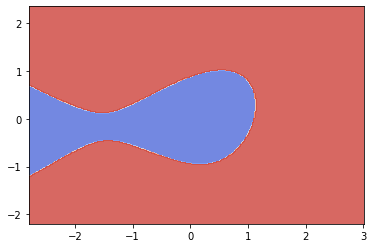

In [20]:
x = pd.DataFrame(X_train)
y = pd.DataFrame(Y_train)
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(x)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model_PCA = SVC(C= 50, gamma= 0.05,verbose=True)
clf = model_PCA.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()